## KGB Model LN Auto V2 With LDA and Variable Reduction

In [2]:
!pip install xgboost

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import json
import logging
import xgboost as xgb
import ast
import itertools
import scipy.stats as ss
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2
import os
import sys

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

In [4]:
sys.path.append('/root/Unified_LN_V2/')
from Utilities import *

In [5]:
Train = pd.read_csv('/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/Mono_Data/3_Auto_Train_Binned_Data_260324.csv')
Test = pd.read_csv('/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/Mono_Data/3_Auto_Test_Binned_Data_260324.csv')
Oot= pd.read_csv('/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/Mono_Data/3_Auto_Oot_Binned_Data_260324.csv')
TTD= pd.read_csv('/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/Mono_Data/3_Auto_Ttd_Binned_Data_260324.csv')
# TTD_Oot= pd.read_csv('/root/Unified_LN_V2/LN_Auto_V2/Data/1_LN_Auto_V2_OOT_Data_220324.csv')

Train.shape, Test.shape, Oot.shape, TTD.shape#, TTD_Oot.shape

((146855, 145), (62938, 145), (37121, 144), (685215, 144))

In [6]:
req_cols= ['assetpropevercount', 'sourcenonderogcount06month', 'addronfilecount', 'addrinputcountyratio', 'assetpropnewestsaleprice', 'addrcurrenttaxvalue', 'addrinputavmvalue', 'addrinputavmvalue60month', 'addrinputlastsaleprice', 'addrinputtaxmarketvalue', 'sourcecredheadertimeoldest', 'addrinputphonecount', 'assetpropcurrenttaxtotal', 'addrcurrentavmvalue', 'assetproppurchasetimeoldest', 'addrpreviouslengthofres', 'addrinputlengthofres', 'addrcurrenttaxmarketvalue', 'addrprevioustimenewest', 'addrcurrenttractratio', 'sourcenonderogcount12month', 'assetpropcurrentcount', 'addrinputsubjectcount', 'sourcenonderogcount', 'addrinputtaxvalue', 'assetpropeversoldcount', 'businessassociationtimeoldest', 'addrinputtractratio', 'derogtimenewest', 'addrchangecount24month', 'addrinputtimelastsale', 'educationinstitutionprivate', 'addrinputblockratio', 'businesstitleleadership', 'addrcurrentlengthofres', 'addrcurrentavmratio12monthprior', 'addrcurrentblockratio', 'derogcount', 'profliccount', 'addrinputavmratio60monthprior', 'addrcurrentcountyratio', 'assetpropsaletimeoldest', 'subjectrecordtimeoldest', 'addrcurrenttimenewest', 'proflictypecategory', 'criminalnonfelonytimenewest', 'lienjudgmentdollartotal', 'addrcurrentlastsalesprice', 'addrinputtimenewest', 'evictiontimenewest', 'bankruptcycount', 'addrcurrenttimelastsale', 'addrinputtimeoldest', 'addrlastmovetaxratiodiff', 'criminalnonfelonycount', 'sourcenonderogcount03month', 'addrchangecount03month', 'addrchangecount06month', 'addrchangecount12month', 'addrchangecount60month', 'addrcurrentavmratio60monthprior', 'addrcurrentavmvalue12month', 'addrcurrentavmvalue60month', 'addrcurrentcorrectional', 'addrcurrentdeedmailing', 'addrcurrentphoneservice', 'addrcurrentsubjectowned', 'addrcurrenttimeoldest', 'addrinputavmratio12monthprior', 'addrinputavmvalue12month', 'addrinputdeedmailing', 'addrinputphoneservice', 'addrinputproblems', 'addrinputsubjectowned', 'addrlastmoveecontrajectory', 'addronfilecollege', 'addronfilecorrectional', 'addronfilehighrisk', 'addrpreviouscorrectional', 'addrprevioussubjectowned', 'addrprevioustimeoldest', 'alertregulatorycondition', 'assetownership', 'assetpersonal', 'assetpersonalcount', 'assetprop', 'assetpropnewestmortgagetype', 'assetproppurchasecount12month', 'assetproppurchasetimenewest', 'assetpropsalepurchaseratio', 'assetpropsaletimenewest', 'assetpropsoldcount12month', 'bankruptcychapter', 'bankruptcycount24month', 'bankruptcydismissed24month', 'bankruptcystatus', 'bankruptcytimenewest', 'businessassociation', 'criminalfelonycount', 'criminalfelonycount12month', 'criminalfelonytimenewest', 'criminalnonfelonycount12month', 'derogcount12month', 'educationattendance', 'educationevidence', 'educationinstitutionrating', 'educationprogramattended', 'evictioncount', 'evictioncount12month', 'inquiryauto12month', 'inquirybanking12month', 'inquirycollections12month', 'inquirynonshortterm12month', 'inquiryshortterm12month', 'inquirytelcom12month', 'lienjudgmentcount', 'lienjudgmentcount12month', 'lienjudgmentcourtcount', 'lienjudgmentforeclosurecount', 'lienjudgmentothercount', 'lienjudgmentsmallclaimscount', 'lienjudgmenttaxcount', 'lienjudgmenttimenewest', 'shorttermloanrequest', 'shorttermloanrequest12month', 'shorttermloanrequest24month', 'sourcecredheadertimenewest', 'sourcevoterregistration', 'subjectnewestrecord12month', 'subjectrecordtimenewest']
len(req_cols)

130

In [7]:
all_cols= ['unique_id', 'client', 'app_date', 'approve_flag', 'funded_flag', 'fico_pb', 'fico_cb', 'bad_flag', 'product', 'auto_score', 'bankcard_score', 'Race', 'Gender', 'age_cuts'] + req_cols
len(all_cols)

144

In [8]:
Train[all_cols].head()

,unique_id,client,app_date,approve_flag,funded_flag,fico_pb,fico_cb,bad_flag,product,auto_score,bankcard_score,Race,Gender,age_cuts,assetpropevercount,sourcenonderogcount06month,addronfilecount,addrinputcountyratio,assetpropnewestsaleprice,addrcurrenttaxvalue,addrinputavmvalue,addrinputavmvalue60month,addrinputlastsaleprice,addrinputtaxmarketvalue,sourcecredheadertimeoldest,addrinputphonecount,assetpropcurrenttaxtotal,addrcurrentavmvalue,assetproppurchasetimeoldest,addrpreviouslengthofres,addrinputlengthofres,addrcurrenttaxmarketvalue,addrprevioustimenewest,addrcurrenttractratio,sourcenonderogcount12month,assetpropcurrentcount,addrinputsubjectcount,sourcenonderogcount,addrinputtaxvalue,assetpropeversoldcount,businessassociationtimeoldest,addrinputtractratio,derogtimenewest,addrchangecount24month,addrinputtimelastsale,educationinstitutionprivate,addrinputblockratio,businesstitleleadership,addrcurrentlengthofres,addrcurrentavmratio12monthprior,addrcurrentblockratio,derogcount,profliccount,addrinputavmratio60monthprior,addrcurrentcountyratio,assetpropsaletimeoldest,subjectrecordtimeoldest,addrcurrenttimenewest,proflictypecategory,criminalnonfelonytimenewest,lienjudgmentdollartotal,addrcurrentlastsalesprice,addrinputtimenewest,evictiontimenewest,bankruptcycount,addrcurrenttimelastsale,addrinputtimeoldest,addrlastmovetaxratiodiff,criminalnonfelonycount,sourcenonderogcount03month,addrchangecount03month,addrchangecount06month,addrchangecount12month,addrchangecount60month,addrcurrentavmratio60monthprior,addrcurrentavmvalue12month,addrcurrentavmvalue60month,addrcurrentcorrectional,addrcurrentdeedmailing,addrcurrentphoneservice,addrcurrentsubjectowned,addrcurrenttimeoldest,addrinputavmratio12monthprior,addrinputavmvalue12month,addrinputdeedmailing,addrinputphoneservice,addrinputproblems,addrinputsubjectowned,addrlastmoveecontrajectory,addronfilecollege,addronfilecorrectional,addronfilehighrisk,addrpreviouscorrectional,addrprevioussubjectowned,addrprevioustimeoldest,alertregulatorycondition,assetownership,assetpersonal,assetpersonalcount,assetprop,assetpropnewestmortgagetype,assetproppurchasecount12month,assetproppurchasetimenewest,assetpropsalepurchaseratio,assetpropsaletimenewest,assetpropsoldcount12month,bankruptcychapter,bankruptcycount24month,bankruptcydismissed24month,bankruptcystatus,bankruptcytimenewest,businessassociation,criminalfelonycount,criminalfelonycount12month,criminalfelonytimenewest,criminalnonfelonycount12month,derogcount12month,educationattendance,educationevidence,educationinstitutionrating,educationprogramattended,evictioncount,evictioncount12month,inquiryauto12month,inquirybanking12month,inquirycollections12month,inquirynonshortterm12month,inquiryshortterm12month,inquirytelcom12month,lienjudgmentcount,lienjudgmentcount12month,lienjudgmentcourtcount,lienjudgmentforeclosurecount,lienjudgmentothercount,lienjudgmentsmallclaimscount,lienjudgmenttaxcount,lienjudgmenttimenewest,shorttermloanrequest,shorttermloanrequest12month,shorttermloanrequest24month,sourcecredheadertimenewest,sourcevoterregistration,subjectnewestrecord12month,subjectrecordtimenewest
0,319468,Tower,2017-04-13,1.0,1.0,857.0,NaN,0.0,Auto,777.0,789.0,white,M,Age 62 and over,"[1.0, 2.0)","[-inf, 2.0)","[-inf, 10.0)","[0.85, 1.01)",[-1],"[-inf, 510.0)","[280500.0, 363171.0)","[182000.0, 244673.0)","[120570.0, 208000.0)","[131500.0, 299200.0)","[421.0, inf)","[0.436, inf)","[15977.0, 324300.0)","[-inf, 90271.0)",[-1],"[-inf, 23.0)",[-1],"[-inf, 9000.0)","[159.0, inf)","[1.05, 1.47)","[-inf, 2.0)","[1.0, 2.0)","[2.0, inf)","[-inf, 2.0)","[246800.0, inf)","[-inf, 1.0)",[-1],"[0.91, 1.03)",[-1],"[-inf, 1.0)",[-1],[-1],"[1.01, 1.19)",[-1],"[-inf, 9.0)","[-inf, 1.33)","[1.02, 1.41)","[-inf, 1.0)","[-inf, 0.0454)","[-inf, 1.52)","[0.55, 0.89)",[-1],"[425.0, inf)","[4.755, inf)",[-1],[-1],"[-inf, 683.805)",[-1],[-1],[-1],"[-inf, 0.0352)",[-1],[-1],[-1],"[-inf, 0.0164)","[-inf, 2.0)","[-inf, 0.0404)","[-inf, 0.0865)","[-inf, 1.0)","[-inf, 1.0)","[1.66, inf)","[-inf

In [9]:
print({'Length': Train['funded_flag'].sum(), 'Bads': Train['bad_flag'].sum()})
print({'Length': Test['funded_flag'].sum(), 'Bads': Test['bad_flag'].sum()})
print({'Length': Oot['funded_flag'].sum(), 'Bads': Oot['bad_flag'].sum()})

{'Length': 146855.0, 'Bads': 2227.0}
{'Length': 62938.0, 'Bads': 959.0}
{'Length': 37121.0, 'Bads': 545.0}


In [10]:
Train.shape, Test.shape, Oot.shape

((146855, 145), (62938, 145), (37121, 144))

In [11]:
Train['wt2'].describe([0.9, 0.95, 0.99])

count    146855.000000
mean          1.669488
std           0.586060
min           1.060974
50%           1.487468
90%           2.326326
95%           2.722267
99%           3.905550
max          14.347176
Name: wt2, dtype: float64

In [12]:
Train.groupby('client')['wt2'].agg(['count', 'min', 'mean', 'max'])

,count,min,mean,max
client,,,,
Arkansas,27867,1.095290,1.583894,8.997074
Bethpage,8328,1.060974,1.453413,5.114712
CPM,6702,1.110488,1.601482,6.383648
GESA,19768,1.101697,1.810696,9.780985
Guardian,19177,1.101219,1.931245,13.497463
HFCU,2044,1.117645,1.662495,8.340647
Hawaii,1438,1.091428,1.775832,8.729644
NCU,595,1.142343,1.784662,5.058578
Numerica,18091,1.096292,1.770058,12.683987


In [13]:
Train= Train[all_cols + ['wt2']]
Test= Test[all_cols + ['wt2']]
Oot= Oot[all_cols]
TTD= TTD[all_cols]
# TTD_Oot= TTD_Oot[all_cols]

Train.shape, Test.shape, Oot.shape, TTD.shape#, TTD_Oot.shape

((146855, 145), (62938, 145), (37121, 144), (685215, 144))

In [14]:
### Convert the Variable into categorical
var_to_cat= '''businesstitleleadership
proflictypecategory
addrcurrentdeedmailing
addrcurrentphoneservice
addrcurrentsubjectowned
addrinputdeedmailing
addrinputphoneservice
addrinputproblems
addrinputsubjectowned
addrlastmoveecontrajectory
addronfilecollege
addronfilecorrectional
addronfilehighrisk
addrprevioussubjectowned
alertregulatorycondition
assetownership
assetpersonal
assetprop
assetpropnewestmortgagetype
bankruptcychapter
bankruptcystatus
businessassociation
educationattendance
educationevidence
educationinstitutionrating
educationprogramattended
inquiryauto12month
inquirybanking12month
inquirycollections12month
inquirynonshortterm12month
inquiryshortterm12month
inquirytelcom12month
shorttermloanrequest
shorttermloanrequest12month
shorttermloanrequest24month
subjectnewestrecord12month
sourcevoterregistration'''.splitlines()
len(var_to_cat)

37

In [15]:
var_to_cat= list(set(var_to_cat))
len(var_to_cat)

37

In [16]:
for var in var_to_cat:
    Train[var]= [f"[{i}]" if i!= '[-1]' else i for i in Train[var].astype(str)]
    Test[var]= [f"[{i}]" if i!= '[-1]' else i for i in Test[var].astype(str)]
    Oot[var]= [f"[{i}]" if i!= '[-1]' else i for i in Oot[var].astype(str)]
    TTD[var]= [f"[{i}]" if i!= '[-1]' else i for i in TTD[var].astype(str)]

In [17]:
print(Train['bankruptcystatus'].value_counts(dropna= False))
print(Test['bankruptcystatus'].value_counts(dropna= False))
print(Oot['bankruptcystatus'].value_counts(dropna= False))
print(TTD['bankruptcystatus'].value_counts(dropna= False))

bankruptcystatus
[0]     141943
[1]       4543
[2]        337
[-1]        32
Name: count, dtype: int64
bankruptcystatus
[0]     60829
[1]      1941
[2]       157
[-1]       11
Name: count, dtype: int64
bankruptcystatus
[0]     35903
[1]      1132
[2]        84
[-1]        2
Name: count, dtype: int64
bankruptcystatus
[0]     648409
[1]      33203
[2]       3175
[-1]       428
Name: count, dtype: int64


In [18]:
Train[req_cols].isnull().sum()

assetpropevercount                 0
sourcenonderogcount06month         0
addronfilecount                    0
addrinputcountyratio               0
assetpropnewestsaleprice           0
addrcurrenttaxvalue                0
addrinputavmvalue                  0
addrinputavmvalue60month           0
addrinputlastsaleprice             0
addrinputtaxmarketvalue            0
sourcecredheadertimeoldest         0
addrinputphonecount                0
assetpropcurrenttaxtotal           0
addrcurrentavmvalue                0
assetproppurchasetimeoldest        0
addrpreviouslengthofres            0
addrinputlengthofres               0
addrcurrenttaxmarketvalue          0
addrprevioustimenewest             0
addrcurrenttractratio              0
sourcenonderogcount12month         0
assetpropcurrentcount              0
addrinputsubjectcount              0
sourcenonderogcount                0
addrinputtaxvalue                  0
assetpropeversoldcount             0
businessassociationtimeoldest      0
a

In [19]:
path_to_save= '/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_5/'

In [20]:
Train['funded_flag'].sum(), Train.shape, Train['bad_flag'].sum(), Train['bad_flag'].mean()

(146855.0, (146855, 145), 2227.0, 0.015164618160770828)

In [21]:
Test['funded_flag'].sum(), Test.shape, Test['bad_flag'].sum(), Test['bad_flag'].mean()

(62938.0, (62938, 145), 959.0, 0.015237217579204931)

In [22]:
def Bucket_Order(data):
    data['lower_bound'] = data['Bucket'].str.replace('[','').str.replace(']','').str.replace('(','').str.replace(')','').str.split(',').str[0]
    data['lower_bound'] = data['lower_bound'].apply(lambda x: -np.inf if x == '-inf' else np.inf if x == 'inf' else float(x))
    data = data.sort_values('lower_bound')
    a = data.loc[data['lower_bound']==-1]
    b = data.loc[data['lower_bound']!=-1]
    b['Is_Trend']= 'Yes' if (
            (b['Train_BadRate'].is_monotonic_decreasing and b['Test_BadRate'].is_monotonic_decreasing) or
            (b['Train_BadRate'].is_monotonic_increasing and b['Test_BadRate'].is_monotonic_increasing)
        ) else 'No'
    data = pd.concat(objs=[a,b])
    data = data.drop(columns=['lower_bound'])
    return data

In [23]:
# df_bv= pd.DataFrame()

# for col in req_cols:
#     print(col)
#     ### Train
#     temp_tr= Train.groupby(col).agg(
#         bad_count_tr= ('bad_flag', 'sum'),
#         bad_rate_tr= ('bad_flag', 'mean'),
#                                 # p1_bad_rate_tr= ('p1', 'mean'),
#                                    volume_tr= ('unique_id', 'count')).reset_index()
#     temp_tr.columns= ['Bucket', 'Train_BadCount', 'Train_BadRate', 'Train_Count']#'Train_P1', 
#     temp_tr.insert(0, 'variable', col)
    
#     # temp_tr= temp_tr.sort_values(by= ['bad_rate_tr']).reset_index(drop= True)
#     # temp_tr['bad_rate_rank_tr']= range(1, len(temp_tr)+1)
#     # temp_tr= temp_tr.sort_values(by= ['p1_bad_rate_tr']).reset_index(drop= True)
#     # temp_tr['p1_bad_rank_tr']= range(1, len(temp_tr)+1)
    
#     ### Test
#     temp_te= Test.groupby(col).agg(
#         bad_count_te= ('bad_flag', 'sum'),
#         bad_rate_te= ('bad_flag', 'mean'),
#                                 # p1_bad_rate_te= ('p1', 'mean'),
#                                   volume_te= ('unique_id', 'count')).reset_index()
#     temp_te.columns= ['Bucket', 'Test_BadCount', 'Test_BadRate', 'Test_Count']#'Test_P1', 
#     #temp_te['variable']= col
    
#     # temp_te= temp_te.sort_values(by= ['bad_rate_te']).reset_index(drop= True)
#     # temp_te['bad_rate_rank_te']= range(1, len(temp_te)+1)
#     # temp_te= temp_te.sort_values(by= ['p1_bad_rate_te']).reset_index(drop= True)
#     # temp_te['p1_bad_rank_te']= range(1, len(temp_te)+1)
    
#     ### Concatenating
#     temp= temp_tr.merge(temp_te, on= ['Bucket'], how= 'left')
#     # temp= temp.sort_values(by= ['bucket']).reset_index(drop= True)
#     temp= Bucket_Order(temp)
#     # display(temp)
    
#     df_bv= pd.concat([df_bv, temp]).reset_index(drop= True)
    
#     del temp, temp_tr, temp_te

In [24]:
# df_bv.head()

In [25]:
# var_trend_break= list(df_bv[(df_bv['Is_Trend']== 'No') & (~(df_bv['variable'].isin(var_to_cat)))]['variable'].unique())
# var_trend_break, len(var_trend_break)

In [26]:
var_trend_break= ['assetpropnewestsaleprice',
  'addrinputavmvalue60month',
  'addrinputlastsaleprice',
  'assetpropcurrenttaxtotal',
  'addrcurrenttractratio',
  'businessassociationtimeoldest',
  'derogtimenewest',
  'educationinstitutionprivate',
  'addrinputavmratio60monthprior',
  'addrcurrentcountyratio',
  'assetpropsaletimeoldest',
  'criminalnonfelonytimenewest',
  'addrcurrentlastsalesprice',
  'evictiontimenewest',
  'bankruptcycount',
  'addrinputtimeoldest',
  'addrcurrentavmratio60monthprior',
  'addrinputavmvalue12month',
  'assetpropsaletimenewest',
  'bankruptcytimenewest',
  'criminalfelonycount12month',
  'criminalfelonytimenewest',
  'lienjudgmentothercount',
  'lienjudgmenttimenewest',
  'sourcecredheadertimenewest']
len(var_trend_break), len(list(set(var_trend_break)))

(25, 25)

### Base Model Weighted Auto Without Segmentation Without FLA, LDA

In [27]:
!pip install hyperopt

In [28]:
import numpy as np
import pandas as pd
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
import h2o
from h2o.estimators import H2OXGBoostEstimator
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
import warnings
warnings.filterwarnings('ignore')

In [29]:
### Starting H2o Session
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,10 hours 1 min
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_vn6wb3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.181 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [30]:
Train['unique_id']= Train['unique_id'].astype(str)
Test['unique_id']= Test['unique_id'].astype(str)
Oot['unique_id']= Oot['unique_id'].astype(str)
TTD['unique_id']= TTD['unique_id'].astype(str)

In [31]:
train_h2o = h2o.H2OFrame(Train)
test_h2o = h2o.H2OFrame(Test)
oot_h2o= h2o.H2OFrame(Oot)
ttd_h2o= h2o.H2OFrame(TTD)
print(Train.shape,train_h2o.shape,Test.shape,test_h2o.shape, oot_h2o.shape, ttd_h2o.shape)
bad_col = 'bad_flag'
Train[bad_col].mean(),Test[bad_col].mean()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(146855, 145) (146855, 145) (62938, 145) (62938, 145) (37121, 144) (685215, 144)


(0.015164618160770828, 0.015237217579204931)

In [32]:
# for col in var_to_cat:
#     train_h2o[col] = train_h2o[col].asfactor()
#     test_h2o[col] = test_h2o[col].asfactor()
#     oot_h2o[col] = oot_h2o[col].asfactor()
#     ttd_h2o[col] = ttd_h2o[col].asfactor()

In [33]:
for k in Train['bankruptcychapter'].unique():
    print(k, train_h2o[train_h2o['bankruptcychapter']== k].shape)

[0] (141943, 145)
[1] (3731, 145)
[2] (1178, 145)
[-1] (3, 145)


In [34]:
train_h2o.head(rows= 2)

unique_id,client,app_date,approve_flag,funded_flag,fico_pb,fico_cb,bad_flag,product,auto_score,bankcard_score,Race,Gender,age_cuts,assetpropevercount,sourcenonderogcount06month,addronfilecount,addrinputcountyratio,assetpropnewestsaleprice,addrcurrenttaxvalue,addrinputavmvalue,addrinputavmvalue60month,addrinputlastsaleprice,addrinputtaxmarketvalue,sourcecredheadertimeoldest,addrinputphonecount,assetpropcurrenttaxtotal,addrcurrentavmvalue,assetproppurchasetimeoldest,addrpreviouslengthofres,addrinputlengthofres,addrcurrenttaxmarketvalue,addrprevioustimenewest,addrcurrenttractratio,sourcenonderogcount12month,assetpropcurrentcount,addrinputsubjectcount,sourcenonderogcount,addrinputtaxvalue,assetpropeversoldcount,businessassociationtimeoldest,addrinputtractratio,derogtimenewest,addrchangecount24month,addrinputtimelastsale,educationinstitutionprivate,addrinputblockratio,businesstitleleadership,addrcurrentlengthofres,addrcurrentavmratio12monthprior,addrcurrentblockratio,derogcount,profliccount,addrinputavmratio60monthprior,addrcurrentcountyratio,assetpropsaletimeoldest,subjectrecordtimeoldest,addrcurrenttimenewest,proflictypecategory,criminalnonfelonytimenewest,lienjudgmentdollartotal,addrcurrentlastsalesprice,addrinputtimenewest,evictiontimenewest,bankruptcycount,addrcurrenttimelastsale,addrinputtimeoldest,addrlastmovetaxratiodiff,criminalnonfelonycount,sourcenonderogcount03month,addrchangecount03month,addrchangecount06month,addrchangecount12month,addrchangecount60month,addrcurrentavmratio60monthprior,addrcurrentavmvalue12month,addrcurrentavmvalue60month,addrcurrentcorrectional,addrcurrentdeedmailing,addrcurrentphoneservice,addrcurrentsubjectowned,addrcurrenttimeoldest,addrinputavmratio12monthprior,addrinputavmvalue12month,addrinputdeedmailing,addrinputphoneservice,addrinputproblems,addrinputsubjectowned,addrlastmoveecontrajectory,addronfilecollege,addronfilecorrectional,addronfilehighrisk,addrpreviouscorrectional,addrprevioussubjectowned,addrprevioustimeoldest,alertregulatorycondition,assetownership,assetpersonal,assetpersonalcount,assetprop,assetpropnewestmortgagetype,assetproppurchasecount12month,assetproppurchasetimenewest,assetpropsalepurchaseratio,assetpropsaletimenewest,assetpropsoldcount12month,bankruptcychapter,bankruptcycount24month,bankruptcydismissed24month,bankruptcystatus,bankruptcytimenewest,businessassociation,criminalfelonycount,criminalfelonycount12month,criminalfelonytimenewest,criminalnonfelonycount12month,derogcount12month,educationattendance,educationevidence,educationinstitutionrating,educationprogramattended,evictioncount,evictioncount12month,inquiryauto12month,inquirybanking12month,inquirycollections12month,inquirynonshortterm12month,inquiryshortterm12month,inquirytelcom12month,lienjudgmentcount,lienjudgmentcount12month,lienjudgmentcourtcount,lienjudgmentforeclosurecount,lienjudgmentothercount,lienjudgmentsmallclaimscount,lienjudgmenttaxcount,lienjudgmenttimenewest,shorttermloanrequest,shorttermloanrequest12month,shorttermloanrequest24month,sourcecredheadertimenewest,sourcevoterregistration,subjectnewestrecord12month,subjectrecordtimenewest,wt2
319468,Tower,2017-04-13 00:00:00,1,1,857,nan,0,Auto,777,789,white,M,Age 62 and over,"[1.0, 2.0)","[-inf, 2.0)","[-inf, 10.0)","[0.85, 1.01)",[-1],"[-inf, 510.0)","[280500.0, 363171.0)","[182000.0, 244673.0)","[120570.0, 208000.0)","[131500.0, 299200.0)","[421.0, inf)","[0.436, inf)","[15977.0, 324300.0)","[-inf, 90271.0)",[-1],"[-inf, 23.0)",[-1],"[-inf, 9000.0)","[159.0, inf)","[1.05, 1.47)","[-inf, 2.0)","[1.0, 2.0)","[2.0, inf)","[-inf, 2.0)","[246800.0, inf)","[-inf, 1.0)",[-1],"[0.91, 1.03)",[-1],"[-inf, 1.0)",[-1],[-1],"[1.01, 1.19)",[-1],"[-inf, 9.0)","[-inf, 1.33)","[1.02, 1.41)","[-inf, 1.0)","[-inf, 0.0454)","[-inf, 1.52)","[0.55, 0.89)",[-1],"[425.0, inf)","[4.755, inf)",[-1],[-1],"[-inf, 683.805)",[-1],[-1],[-1],"[-inf, 0.0352)",[-1],[-1],[-1],"[-inf, 0.0164)","[-inf, 2.0)","[-inf, 0.0404)","[-inf, 0.0865)","[-inf, 1.0)","[-inf, 1.0)","[1.66, inf)","[-inf, 

In [35]:
train_h2o[req_cols].head(rows= 2)

assetpropevercount,sourcenonderogcount06month,addronfilecount,addrinputcountyratio,assetpropnewestsaleprice,addrcurrenttaxvalue,addrinputavmvalue,addrinputavmvalue60month,addrinputlastsaleprice,addrinputtaxmarketvalue,sourcecredheadertimeoldest,addrinputphonecount,assetpropcurrenttaxtotal,addrcurrentavmvalue,assetproppurchasetimeoldest,addrpreviouslengthofres,addrinputlengthofres,addrcurrenttaxmarketvalue,addrprevioustimenewest,addrcurrenttractratio,sourcenonderogcount12month,assetpropcurrentcount,addrinputsubjectcount,sourcenonderogcount,addrinputtaxvalue,assetpropeversoldcount,businessassociationtimeoldest,addrinputtractratio,derogtimenewest,addrchangecount24month,addrinputtimelastsale,educationinstitutionprivate,addrinputblockratio,businesstitleleadership,addrcurrentlengthofres,addrcurrentavmratio12monthprior,addrcurrentblockratio,derogcount,profliccount,addrinputavmratio60monthprior,addrcurrentcountyratio,assetpropsaletimeoldest,subjectrecordtimeoldest,addrcurrenttimenewest,proflictypecategory,criminalnonfelonytimenewest,lienjudgmentdollartotal,addrcurrentlastsalesprice,addrinputtimenewest,evictiontimenewest,bankruptcycount,addrcurrenttimelastsale,addrinputtimeoldest,addrlastmovetaxratiodiff,criminalnonfelonycount,sourcenonderogcount03month,addrchangecount03month,addrchangecount06month,addrchangecount12month,addrchangecount60month,addrcurrentavmratio60monthprior,addrcurrentavmvalue12month,addrcurrentavmvalue60month,addrcurrentcorrectional,addrcurrentdeedmailing,addrcurrentphoneservice,addrcurrentsubjectowned,addrcurrenttimeoldest,addrinputavmratio12monthprior,addrinputavmvalue12month,addrinputdeedmailing,addrinputphoneservice,addrinputproblems,addrinputsubjectowned,addrlastmoveecontrajectory,addronfilecollege,addronfilecorrectional,addronfilehighrisk,addrpreviouscorrectional,addrprevioussubjectowned,addrprevioustimeoldest,alertregulatorycondition,assetownership,assetpersonal,assetpersonalcount,assetprop,assetpropnewestmortgagetype,assetproppurchasecount12month,assetproppurchasetimenewest,assetpropsalepurchaseratio,assetpropsaletimenewest,assetpropsoldcount12month,bankruptcychapter,bankruptcycount24month,bankruptcydismissed24month,bankruptcystatus,bankruptcytimenewest,businessassociation,criminalfelonycount,criminalfelonycount12month,criminalfelonytimenewest,criminalnonfelonycount12month,derogcount12month,educationattendance,educationevidence,educationinstitutionrating,educationprogramattended,evictioncount,evictioncount12month,inquiryauto12month,inquirybanking12month,inquirycollections12month,inquirynonshortterm12month,inquiryshortterm12month,inquirytelcom12month,lienjudgmentcount,lienjudgmentcount12month,lienjudgmentcourtcount,lienjudgmentforeclosurecount,lienjudgmentothercount,lienjudgmentsmallclaimscount,lienjudgmenttaxcount,lienjudgmenttimenewest,shorttermloanrequest,shorttermloanrequest12month,shorttermloanrequest24month,sourcecredheadertimenewest,sourcevoterregistration,subjectnewestrecord12month,subjectrecordtimenewest
"[1.0, 2.0)","[-inf, 2.0)","[-inf, 10.0)","[0.85, 1.01)",[-1],"[-inf, 510.0)","[280500.0, 363171.0)","[182000.0, 244673.0)","[120570.0, 208000.0)","[131500.0, 299200.0)","[421.0, inf)","[0.436, inf)","[15977.0, 324300.0)","[-inf, 90271.0)",[-1],"[-inf, 23.0)",[-1],"[-inf, 9000.0)","[159.0, inf)","[1.05, 1.47)","[-inf, 2.0)","[1.0, 2.0)","[2.0, inf)","[-inf, 2.0)","[246800.0, inf)","[-inf, 1.0)",[-1],"[0.91, 1.03)",[-1],"[-inf, 1.0)",[-1],[-1],"[1.01, 1.19)",[-1],"[-inf, 9.0)","[-inf, 1.33)","[1.02, 1.41)","[-inf, 1.0)","[-inf, 0.0454)","[-inf, 1.52)","[0.55, 0.89)",[-1],"[425.0, inf)","[4.755, inf)",[-1],[-1],"[-inf, 683.805)",[-1],[-1],[-1],"[-inf, 0.0352)",[-1],[-1],[-1],"[-inf, 0.0164)","[-inf, 2.0)","[-inf, 0.0404)","[-inf, 0.0865)","[-inf, 1.0)","[-inf, 1.0)","[1.66, inf)","[-inf, 76843.0)","[-inf, 69000.0)","[0.0, inf)",[0],[1],[0],"[242.0, inf)","[-inf, 1.33)","[256476.0, 313290.0)",[0],[1],[0],[1],[1],[0],[0],[0],"[0.0, inf)",[1],"[247.0, inf)",[1],[1],[0],"[-inf, 0.203)",[1],[-1],"[-inf, 0.07

In [36]:
# for var in var_to_cat:
#     print(var, ttd_h2o[var].unique())

### Baseline

In [37]:
req_cols_orig= req_cols.copy()
len(req_cols_orig), len(req_cols)

(130, 130)

In [38]:
barsath_list_to_drop= '''addrinputavmvalue
addrinputphonecount
addrinputavmvalue12month
sourcevoterregistration
addrinputblockratio
addrinputcountyratio
educationinstitutionrating
addrcurrentavmvalue12month
addrinputavmvalue60month
addrlastmoveecontrajectory
addrcurrentavmvalue
businesstitleleadership
assetpropeversoldcount
addrprevioussubjectowned
addrinputtractratio
addrcurrentcountyratio
addrcurrentavmvalue60month
addrcurrentavmratio60monthprior
educationevidence
assetpersonal
proflictypecategory
addrprevioustimenewest'''.splitlines()
len(barsath_list_to_drop), len(list(set(barsath_list_to_drop)))

(22, 22)

In [39]:
unique_cols = ['unique_id', 'client']
wt_col = 'wt2'
folds = 10
# predictors = train_h2o.columns
req_cols = [var for var in req_cols if var not in var_trend_break] #barsath_list_to_drop
model_cols = unique_cols + [wt_col] + [bad_col] + req_cols
train_h2o[bad_col]= train_h2o[bad_col].asfactor()
len(req_cols)

105

In [40]:
req_cols

['assetpropevercount',
 'sourcenonderogcount06month',
 'addronfilecount',
 'addrinputcountyratio',
 'addrcurrenttaxvalue',
 'addrinputavmvalue',
 'addrinputtaxmarketvalue',
 'sourcecredheadertimeoldest',
 'addrinputphonecount',
 'addrcurrentavmvalue',
 'assetproppurchasetimeoldest',
 'addrpreviouslengthofres',
 'addrinputlengthofres',
 'addrcurrenttaxmarketvalue',
 'addrprevioustimenewest',
 'sourcenonderogcount12month',
 'assetpropcurrentcount',
 'addrinputsubjectcount',
 'sourcenonderogcount',
 'addrinputtaxvalue',
 'assetpropeversoldcount',
 'addrinputtractratio',
 'addrchangecount24month',
 'addrinputtimelastsale',
 'addrinputblockratio',
 'businesstitleleadership',
 'addrcurrentlengthofres',
 'addrcurrentavmratio12monthprior',
 'addrcurrentblockratio',
 'derogcount',
 'profliccount',
 'subjectrecordtimeoldest',
 'addrcurrenttimenewest',
 'proflictypecategory',
 'lienjudgmentdollartotal',
 'addrinputtimenewest',
 'addrcurrenttimelastsale',
 'addrlastmovetaxratiodiff',
 'criminalnon

In [41]:
req_cols= [col for col in req_cols if 'education' not in col]
len(req_cols)

101

In [42]:
train_h2o[req_cols].isna().sum()

0.0

### Run the Code

In [43]:
xgbm_auto_wt_segment_wt_lda_model = H2OXGBoostEstimator(
    ntrees=2000,    
    learn_rate=0.01,
    max_depth=2,    
    model_id="xgb_auto_wt_segment_with_lda_model_4",
    distribution = "bernoulli",    
    seed=42,
    nfolds = folds)#,    ignored_columns = unique_cols)

In [44]:
%%time
xgbm_auto_wt_segment_wt_lda_model.train(y=bad_col, x= req_cols, training_frame=train_h2o, weights_column =wt_col)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
CPU times: user 15 s, sys: 997 ms, total: 16 s
Wall time: 1h 11min 12s


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: xgb_auto_wt_segment_with_lda_model_4


Model Summary: 
    number_of_trees
--  -----------------
    2000

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.019843169411992965
RMSE: 0.14086578510054515
LogLoss: 0.08855365097516665
Mean Per-Class Error: 0.4046289478327654
AUC: 0.806557139089062
AUCPR: 0.1218297826705065
Gini: 0.613114278178124

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08733666910532009
       0       1     Error    Rate
-----  ------  ----  -------  ------------------
0      233861  6076  0.0253   (6076.0/239937.0)
1      4104    1131  0.784    (4104.0/5235.0)
Total  237965  7207  0.0415   (10180.0/245172.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0873367    0.181819  132
max f2                       0.0441957    0.255539  216
max f0point5                 0.140559     0.189233  76
max accuracy                 0.391236     0.978836  5
max precision                0.695415     1         0
max recall                   0.00114388   1         398
max specificity              0.695415     1         0
max absolute_mcc             0.0636144    0.170345  174
max min_per_class_accuracy   0.0247191    0.722725  278
max mean_per_class_accuracy  0.0237602    0.726077  282
max tns                      0.695415     239937    0
max fns                      0.695415     5222.88   0
max fps                      0.000886577  239937    399
max tps                      0.00114388   5235.24   398
max tnr                      0.695415     1         0
max fnr                      0.695415     0.997639  0
max fpr                      0.000886577  1         399
max tpr                      0.00114388   1         398

Gains/Lift Table: Avg response rate:  2.28 %, avg score:  2.90 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0116105                   0.137178           10.1144    10.1144            0.230329         0.213748    0.230329                    0.213748            0.117433        0.117433                   911.437   911.437            0.108288
2        0.0235919                   0.102418           5.47894    7.76021            0.124769         0.135441    0.176719                    0.173979            0.0656455       0.183078                   447.894   676.021            0.163203
3        0.0351248                   0.086693           4.95415    6.83887            0.112818         0.109687    0.155738                    0.152869            0.0571359       0.240214                   395.415   583.887            0.209868
4        0.0466246                   0.0782002          3.53078    6.02294            0.0804044        0.0977218   0.137157                    0.139268            0.040603        0.280817                   253.078   502.294            0.23965
5        0.0579914                   0.0717639          3.74317    5.57608            0.0852411        0.0900857   0.126981                    0.129627            0.042548        0.323365                   274.317   457.608            0.271558
6        0.113419                    0.0499296          2.67135    4.15654            0.0608331        0.0736673   0.0946546                   0.10228             0.148067        0.471432                   167.135   315.654            0.366356
7        0.168316                    0.0357148          

##### Train Predictions

In [43]:
col_tuple_pass= ["unique_id", 'client', "wt2", 'fico_pb', 'auto_score', 'approve_flag', 'funded_flag', 'bad_flag', 'Race', 'Gender', 'age_cuts']

In [44]:
def get_risk_rank(model, data, data_h2o, target, cols_tuple, score_col= 'p1', weight= 'RECWGT', asc= False):
    
    if data_h2o!= None:
        predict = model.predict(data_h2o)
    else:
        predict = model.predict(h2o.H2OFrame(data))
    p =predict.as_data_frame()
    dd = data.loc[:, cols_tuple]
    dd = pd.DataFrame(dd)
    dd = dd.reset_index()
    dd['RECWGT'] = dd["wt2"]
    dd['conwt'] = 1
    dd[target] = dd[target] 
    pred = pd.concat([dd.loc[:, cols_tuple + ['RECWGT', 'conwt']],p],axis=1)
    print(pred[weight].sum(),((pred[weight]*pred[target]).sum()),pred[weight].max())

    data_ks_cap5= rnkOrderingN(pred, target, weight, score_col, 5, asc)
    display(data_ks_cap5[0])
    print(data_ks_cap5[1])
    # data_ks_cap10= rnkOrderingN(pred, target, weight, score_col, 10, asc)
    # display(data_ks_cap10[0])
    # print(data_ks_cap10[1])

#### Weighted

In [47]:
get_risk_rank(model= xgbm_auto_wt_segment_wt_lda_model, data= Train, data_h2o= train_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'RECWGT')

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
245172.65465228388 5235.242054477501 14.3471756739957


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.030091,0.695415,0.054997,49035.086234,45789.694780,3245.391454,6.62,20.0,19.08,61.99,42.91
1,0.017695,0.030090,0.023423,49035.383747,47944.497739,1090.886008,2.22,40.0,39.07,82.83,43.76
2,0.008578,0.017695,0.012373,49033.169485,48426.635786,606.533699,1.24,60.0,59.25,94.41,35.16
3,0.004524,0.008578,0.006321,49034.918293,48805.049983,229.868310,0.47,80.0,79.59,98.80,19.21
4,0.000510,0.004524,0.002893,49034.096893,48971.534309,62.562584,0.13,100.0,100.00,100.00,0.00


{'Gini': 56.42, 'KS': 43.76}


In [48]:
get_risk_rank(model= xgbm_auto_wt_segment_wt_lda_model, data= Test, data_h2o= test_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'RECWGT')

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
105130.63232533663 2219.2405799159274 14.729193454912512


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.030376,0.396388,0.055329,21027.522236,19717.092594,1310.429642,6.23,20.0,19.16,59.05,39.89
1,0.017658,0.030372,0.023530,21025.281507,20544.020403,481.261104,2.29,40.0,39.12,80.73,41.61
2,0.008582,0.017658,0.012395,21025.686574,20763.754340,261.932233,1.25,60.0,59.30,92.54,33.24
3,0.004473,0.008581,0.006301,21027.190493,20910.483256,116.707236,0.56,80.0,79.62,97.80,18.18
4,0.000481,0.004472,0.002872,21024.951517,20976.041152,48.910364,0.23,100.0,100.00,100.00,0.00


{'Gini': 53.169999999999995, 'KS': 41.61}


#### Non-weighted

In [49]:
get_risk_rank(model= xgbm_auto_wt_segment_wt_lda_model, data= Train, data_h2o= train_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
146855 2227.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024023,0.695415,0.044348,29372,27989.0,1383.0,4.71,20.0,19.35,62.10,42.75
1,0.011966,0.024023,0.017660,29370,28893.0,477.0,1.62,40.0,39.33,83.52,44.19
2,0.006578,0.011966,0.008852,29372,29132.0,240.0,0.82,60.0,59.47,94.30,34.83
3,0.003796,0.006577,0.005111,29371,29271.0,100.0,0.34,80.0,79.71,98.79,19.08
4,0.000510,0.003796,0.002522,29370,29343.0,27.0,0.09,100.0,100.00,100.00,0.00


{'Gini': 56.34, 'KS': 44.19}


In [50]:
get_risk_rank(model= xgbm_auto_wt_segment_wt_lda_model, data= Test, data_h2o= test_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
62938 959.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024144,0.396388,0.044601,12588,12027.0,561.0,4.46,20.0,19.40,58.50,39.10
1,0.011985,0.024143,0.017684,12588,12362.0,226.0,1.80,40.0,39.35,82.06,42.71
2,0.006557,0.011985,0.008851,12587,12486.0,101.0,0.80,60.0,59.50,92.60,33.10
3,0.003753,0.006556,0.005061,12588,12544.0,44.0,0.35,80.0,79.74,97.18,17.44
4,0.000481,0.003752,0.002509,12587,12560.0,27.0,0.21,100.0,100.00,100.00,0.00


{'Gini': 52.94, 'KS': 42.71}


In [45]:
Oot['wt2']= 1
TTD['wt2']= 1

In [52]:
get_risk_rank(model= xgbm_auto_wt_segment_wt_lda_model, data= Oot, data_h2o= oot_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
37121 545.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024115,0.400474,0.044555,7425,7127.0,298.0,4.01,20.0,19.49,54.68,35.19
1,0.012068,0.024113,0.017722,7424,7279.0,145.0,1.95,40.0,39.39,81.28,41.89
2,0.006588,0.012067,0.008921,7424,7366.0,58.0,0.78,60.0,59.53,91.93,32.40
3,0.003796,0.006588,0.005113,7424,7397.0,27.0,0.36,80.0,79.75,96.88,17.13
4,0.000531,0.003796,0.002540,7424,7407.0,17.0,0.23,100.0,100.00,100.00,0.00


{'Gini': 50.63999999999999, 'KS': 41.89}


In [53]:
var_imp = xgbm_auto_wt_segment_wt_lda_model._model_json['output']['variable_importances'].as_data_frame()
var_imp['Var_unique'] = var_imp['variable'].str.split('.', expand=True)[0]
var_imp_list_baseline1 = list(var_imp['Var_unique'].unique())

print(var_imp_list_baseline1, len(var_imp_list_baseline1))

['assetownership', 'inquiryauto12month', 'inquiryshortterm12month', 'sourcenonderogcount12month', 'assetpropevercount', 'inquirytelcom12month', 'sourcenonderogcount', 'addrinputcountyratio', 'addrlastmovetaxratiodiff', 'derogcount', 'inquirynonshortterm12month', 'addrcurrenttaxmarketvalue', 'criminalnonfelonycount', 'derogcount12month', 'addrinputtaxvalue', 'evictioncount', 'addrprevioustimeoldest', 'sourcevoterregistration', 'addrinputtimenewest', 'addrcurrentavmvalue60month', 'criminalfelonycount', 'addrinputlengthofres', 'addrchangecount03month', 'addrlastmoveecontrajectory', 'inquirycollections12month', 'bankruptcydismissed24month', 'addrcurrentavmvalue', 'lienjudgmentcount', 'inquirybanking12month', 'bankruptcychapter', 'addrinputtaxmarketvalue', 'addrchangecount24month', 'bankruptcystatus', 'addrcurrentdeedmailing', 'addrinputsubjectcount', 'bankruptcycount24month', 'addrcurrentblockratio', 'addrpreviouslengthofres', 'addrinputdeedmailing', 'assetpropnewestmortgagetype', 'addrcur

In [54]:
var_imp

,variable,relative_importance,scaled_importance,percentage,Var_unique
0,assetownership.[0],64439.054688,1.000000,0.185514,assetownership
1,inquiryauto12month.[0],63686.500000,0.988321,0.183347,inquiryauto12month
2,inquiryshortterm12month.[0],25874.898438,0.401541,0.074491,inquiryshortterm12month
3,"sourcenonderogcount12month.[-inf, 2.0)",22134.259766,0.343491,0.063722,sourcenonderogcount12month
4,"assetpropevercount.[-inf, 1.0)",16286.637695,0.252745,0.046888,assetpropevercount
5,inquirytelcom12month.[0],14879.653320,0.230910,0.042837,inquirytelcom12month
6,"sourcenonderogcount.[4.0, 5.0)",7655.215820,0.118798,0.022039,sourcenonderogcount
7,"addrinputcountyratio.[1.32, inf)",7466.403809,0.115868,0.021495,addrinputcountyratio
8,"sourcenonderogcount.[5.0, inf)",6610.652344,0.102588,0.019031,sourcenonderogcount
9,"addrlastmovetaxratiodiff.[-inf, 0.166)",6608.235840,0.102550,0.019024,addrlastmovetaxratiodiff


## HyperOpt

In [46]:
train_h2o[bad_col] = train_h2o[bad_col].asfactor()
# test_h2o[bad_col] = test_h2o[bad_col].asfactor()
# oot_h2o[bad_col] = oot_h2o[bad_col].asfactor()
# col_list = var_imp_list_baseline1
# len(col_list)
# 75
col_list = ['assetownership', 'inquiryauto12month', 'inquiryshortterm12month', 'sourcenonderogcount12month', 'assetpropevercount', 'inquirytelcom12month', 'sourcenonderogcount', 'derogcount', 'addrlastmovetaxratiodiff', 'inquirynonshortterm12month', 'addrcurrenttaxmarketvalue', 'addrinputtaxvalue', 'criminalnonfelonycount', 'evictioncount', 'derogcount12month', 'addrinputtimenewest', 'addrprevioustimeoldest', 'educationprogramattended', 'criminalfelonycount', 'educationattendance', 'addrinputlengthofres', 'addrcurrentblockratio', 'addrinputtaxmarketvalue', 'bankruptcydismissed24month', 'addrchangecount03month', 'inquirycollections12month', 'inquirybanking12month', 'bankruptcychapter', 'addrinputsubjectcount', 'addrchangecount24month', 'addrcurrentdeedmailing', 'addrinputdeedmailing', 'addrchangecount06month', 'lienjudgmentcount', 'lienjudgmentsmallclaimscount', 'addrpreviouslengthofres', 'bankruptcystatus', 'assetpropnewestmortgagetype', 'bankruptcycount24month', 'assetproppurchasetimeoldest', 'assetproppurchasetimenewest', 'criminalnonfelonycount12month', 'assetpersonalcount', 'addrchangecount60month', 'addrinputtimelastsale', 'addrcurrentlengthofres', 'sourcenonderogcount06month', 'subjectrecordtimeoldest', 'assetpropsalepurchaseratio', 'lienjudgmentcourtcount', 'addronfilecollege', 'addrcurrenttimeoldest', 'lienjudgmenttaxcount', 'evictioncount12month', 'businessassociation', 'addrcurrentavmratio12monthprior', 'addrinputsubjectowned', 'sourcecredheadertimeoldest', 'addrinputphoneservice', 'addrinputavmratio12monthprior', 'assetpropcurrentcount', 'addrcurrenttimenewest', 'shorttermloanrequest', 'lienjudgmentdollartotal', 'lienjudgmentcount12month', 'addronfilecount', 'addrinputproblems']
len(col_list)

67

In [47]:
from IPython.display import clear_output


def get_predictions(data_h2o, bad_col, wt_col, classifier):
    predict = classifier.predict(data_h2o)
    p = predict.as_data_frame()
    dd = pd.DataFrame(data_h2o[:, unique_cols + [bad_col] + [wt_col] + ['age_cuts','Race','Gender']].as_data_frame())
    dd['RECWGT'] = dd[wt_col]
    dd['con_wt'] = 1
    dd['bad'] = dd[bad_col]
    pred = pd.concat([dd.loc[:, ('bad', "RECWGT", 'con_wt', 'age_cuts','Race','Gender')], p], axis=1)
    return pred


def find_cutoff(pred):
    sorted_pred = pred.sort_values(by='p1').reset_index(drop= True)
    cum_bad = sorted_pred['bad'].cumsum()
    bad_rate= sorted_pred['bad'].mean()
    cum_p1 = sorted_pred['p1'].cumsum()
    total_bad = cum_bad.iloc[-1]
#     total_bad= bad_rate
    cutoff_idx = (cum_p1 >= total_bad).idxmax()
    cutoff = sorted_pred.loc[cutoff_idx, 'p1']
    
    print('Pred Description')
    display(pd.DataFrame(pred[['p1']].describe()).T)
    print('Last Row')
    display(pd.DataFrame(sorted_pred.iloc[-1]).T)
    print('Cutoff Index Row')
    display(pd.DataFrame(sorted_pred.iloc[cutoff_idx]).T)
    
    print({'total_bad': total_bad, 'bad_rate': bad_rate, 'cutoff': cutoff, 'total_predicted': cum_p1.iloc[-1], 'max_prob': pred['p1'].max()})
    
    return cutoff

def Equal_Approval_Cutoff_Barsath(pred, target, score_col):
    pred= pred.copy()
    actual_approved_count= pred[target].sum()
    pred= pred.sort_values(by= [score_col])
    pred['con_wt']= 1
    pred['cumsum']= pred['con_wt'].cumsum()
    pred['approved']= np.where(pred['cumsum']<= actual_approved_count, 1, 0)
    return pred #cutoff, original_dataset

def find_cutoff_2(pred):
    pred= pred.copy()
    print('Pred Description')
    display(pd.DataFrame(pred[['p1']].describe()).T)
    prev_min = 1
    for k in range(1,100,1):
        pred["model_approval"] = [1 if i>k/100 else 0 for i in pred['p1']]
        a,b = pred.describe().loc['mean',['model_approval','bad']]
        if prev_min < abs(a-b):
            pred["model_approval"] = [1 if i>(k-1)/100 else 0 for i in pred['p1']]
            break
        else:
            prev_min = abs(a-b)
    print({'cutoff': (k-1)/100})
    return (k-1)/100

def air_calc(pred,prefix):
    air = {}
    target_control_dict = {
        'age_cuts': {
            'target': ['Age 62 and over'],
            'control': ['Age below 62']
        },
        'Race': {
            'target': ['black', 'hispanic'],
            'control': ['white']
        },
        'Race': {
            'target': ['black'],
            'control': ['white']
        },
        'Race': {
            'target': ['hispanic'],
            'control': ['white']
        },
        'Gender': {
            'target': ['F'],
            'control': ['M']
        },
        # 'mmct_tag': {
        #     'target': ['mmct'],
        #     'control': ['non-mmct']
        # }
    }
    
    for var in target_control_dict:
        target_list = target_control_dict[var]['target']
        control_list = target_control_dict[var]['control']
        p_target_list= ','.join(target_list)
        ttd_target= pred[pred[var].isin(target_list)]['con_wt'].sum()
        approved_target= pred[pred[var].isin(target_list)]['approved'].multiply(pred[pred[var].isin(target_list)]['con_wt']).sum()
        ttd_control= pred[pred[var].isin(control_list)]['con_wt'].sum()
        approved_control= pred[pred[var].isin(control_list)]['approved'].multiply(pred[pred[var].isin(control_list)]['con_wt']).sum()
        app_pct_target= round(approved_target/ttd_target, 4)
        app_pct_control= round(approved_control/ttd_control, 4)
        air[prefix+var+p_target_list]= [round(app_pct_target/app_pct_control, 4)]
        
        print({'variable': var, 'ttd_target': ttd_target, 'ttd_control': ttd_control, 
               'approved_target': approved_target, 'approved_control': approved_control})
    print(air)
        
    return air

def air_calc_new(pred,prefix):
    air = {}
    target_control_dict = [
            {'age_cuts': {
                'target': ['Age 62 and over'],
                'control': ['Age below 62']
            }},
            {'Race': {
                'target': ['black', 'hispanic'],
                'control': ['white']
            }},
            {'Race': {
                'target': ['black'],
                'control': ['white']
            }},
            {'Race': {
                'target': ['hispanic'],
                'control': ['white']
            }},
            {'Gender': {
                'target': ['F'],
                'control': ['M']
            }},
            # 'mmct_tag': {
            #     'target': ['mmct'],
            #     'control': ['non-mmct']
            # }
    ]

    for var in target_control_dict:
        for i in var:
            target_list = var[i]['target']
            control_list = var[i]['control']
            p_target_list= ','.join(target_list) if (
                (len(target_list)<= 1) and (('black' in target_list) or ('hispanic' in target_list))
            ) else ''
            
            ttd_target= pred[pred[i].isin(target_list)]['con_wt'].sum()
            approved_target= pred[pred[i].isin(target_list)]['approved'].multiply(pred[pred[i].isin(target_list)]['con_wt']).sum()
            ttd_control= pred[pred[i].isin(control_list)]['con_wt'].sum()
            approved_control= pred[pred[i].isin(control_list)]['approved'].multiply(pred[pred[i].isin(control_list)]['con_wt']).sum()
            app_pct_target= round(approved_target/ttd_target, 4)
            app_pct_control= round(approved_control/ttd_control, 4)
            air[prefix+i+p_target_list]= [round(app_pct_target/app_pct_control, 4)]
        
            # print({'variable': i, 'target_list': p_target_list, 'ttd_target': ttd_target, 'ttd_control': ttd_control, 
                   # 'approved_target': approved_target, 'approved_control': approved_control})
            
    # print(air)
        
    return air

In [48]:
# TTD['ApproveCount'].value_counts(dropna= False)

In [49]:
def get_prediction_2(model, data, data_h2o, target, cols_tuple, score_col= 'p1', weight= 'RECWGT', asc= False):
    if data_h2o!= None:
        predict = model.predict(data_h2o)
    else:
        predict = model.predict(h2o.H2OFrame(data))
    p =predict.as_data_frame()
    dd = data.loc[:, cols_tuple]
    dd = pd.DataFrame(dd)
    dd = dd.reset_index()
    dd['RECWGT'] = dd["wt2"]
    dd['conwt'] = 1
    dd[target] = dd[target] 
    pred = pd.concat([dd.loc[:, cols_tuple + ['RECWGT', 'conwt']],p],axis=1)
    
    return pred

In [50]:
def percentage_approval_cutoff(pred, score_col, percentage, asc= True):
    pred= pred.copy()
    approved_count= int(len(pred)*percentage)
    pred= pred.sort_values(by= [score_col], ascending= asc)
    pred['con_wt']= 1
    pred['cumsum']= pred['con_wt'].cumsum()
    pred['approved']= np.where(pred['cumsum']<= approved_count, 1, 0)
    return pred #cutoff, original_dataset

In [51]:
def get_cutoffs_air(data, score, n_bkts= 20, asc= True):
    data= data.copy()
    # asc= asc.copy()
    
    air_details= []
    for i in [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]:
        perc= i #i*0.05
        a= {}
        a['cutoff']= perc
        temp= percentage_approval_cutoff(data, score, perc, asc= asc)
        a['min_pd']= temp[temp['approved']== 1][score].min()
        a['max_pd']= temp[temp['approved']== 1][score].max()
        a['ttd']= len(temp)
        a['approved_client']= temp['approve_flag'].sum()
        a['approved_scienaptic']= temp['approved'].sum()
        temp_air= air_calc_new(temp, 'AIR TTD')
        a[f'AIR Age']= temp_air['AIR TTDage_cuts'][0]
        a[f'AIR Race']= temp_air['AIR TTDRace'][0]
        a[f'AIR Race Black']= temp_air['AIR TTDRaceblack'][0]
        a[f'AIR Race Hispanic']= temp_air['AIR TTDRacehispanic'][0]
        a[f'AIR Gender']= temp_air['AIR TTDGender'][0]

        air_details.append(a)
        # print(a)
        del a, temp, temp_air
        
    return pd.DataFrame(air_details)

In [52]:
ttd_h2o[req_cols].head(rows= 5)

assetpropevercount,sourcenonderogcount06month,addronfilecount,addrinputcountyratio,addrcurrenttaxvalue,addrinputavmvalue,addrinputtaxmarketvalue,sourcecredheadertimeoldest,addrinputphonecount,addrcurrentavmvalue,assetproppurchasetimeoldest,addrpreviouslengthofres,addrinputlengthofres,addrcurrenttaxmarketvalue,addrprevioustimenewest,sourcenonderogcount12month,assetpropcurrentcount,addrinputsubjectcount,sourcenonderogcount,addrinputtaxvalue,assetpropeversoldcount,addrinputtractratio,addrchangecount24month,addrinputtimelastsale,addrinputblockratio,businesstitleleadership,addrcurrentlengthofres,addrcurrentavmratio12monthprior,addrcurrentblockratio,derogcount,profliccount,subjectrecordtimeoldest,addrcurrenttimenewest,proflictypecategory,lienjudgmentdollartotal,addrinputtimenewest,addrcurrenttimelastsale,addrlastmovetaxratiodiff,criminalnonfelonycount,sourcenonderogcount03month,addrchangecount03month,addrchangecount06month,addrchangecount12month,addrchangecount60month,addrcurrentavmvalue12month,addrcurrentavmvalue60month,addrcurrentcorrectional,addrcurrentdeedmailing,addrcurrentphoneservice,addrcurrentsubjectowned,addrcurrenttimeoldest,addrinputavmratio12monthprior,addrinputdeedmailing,addrinputphoneservice,addrinputproblems,addrinputsubjectowned,addrlastmoveecontrajectory,addronfilecollege,addronfilecorrectional,addronfilehighrisk,addrpreviouscorrectional,addrprevioussubjectowned,addrprevioustimeoldest,alertregulatorycondition,assetownership,assetpersonal,assetpersonalcount,assetprop,assetpropnewestmortgagetype,assetproppurchasecount12month,assetproppurchasetimenewest,assetpropsalepurchaseratio,assetpropsoldcount12month,bankruptcychapter,bankruptcycount24month,bankruptcydismissed24month,bankruptcystatus,businessassociation,criminalfelonycount,criminalnonfelonycount12month,derogcount12month,evictioncount,evictioncount12month,inquiryauto12month,inquirybanking12month,inquirycollections12month,inquirynonshortterm12month,inquiryshortterm12month,inquirytelcom12month,lienjudgmentcount,lienjudgmentcount12month,lienjudgmentcourtcount,lienjudgmentforeclosurecount,lienjudgmentsmallclaimscount,lienjudgmenttaxcount,shorttermloanrequest,shorttermloanrequest12month,shorttermloanrequest24month,sourcevoterregistration,subjectnewestrecord12month,subjectrecordtimenewest
"[3.0, inf)","[2.0, inf)","[10.0, inf)","[-inf, 0.55)","[-inf, 510.0)","[-inf, 97283.0)","[-inf, 4900.0)","[176.0, 253.0)","[-inf, 0.436)","[-inf, 90271.0)","[29.0, 162.0)","[-inf, 23.0)","[113.0, 166.0)","[-inf, 9000.0)","[43.0, 94.0)","[2.0, inf)","[2.0, inf)","[-inf, 1.0)","[5.0, inf)","[-inf, 518.0)","[-inf, 1.0)","[-inf, 0.33)","[-inf, 1.0)",[-1],"[0.11, 0.71)",[-1],"[98.0, 166.0)",[-1],"[0.11, 0.71)","[1.0, inf)","[-inf, 0.0454)","[253.0, 351.0)","[-inf, 4.755)",[-1],"[683.805, inf)","[-inf, 2.581)",[-1],[-1],"[-inf, 0.0164)","[2.0, inf)","[-inf, 0.0404)","[-inf, 0.0865)","[-inf, 1.0)","[-inf, 1.0)",[-1],[-1],"[0.0, inf)",[1],[0],[0],"[99.0, 165.0)",[-1],[1],[0],[0],[0],[1],[0],[0],[0],"[0.0, inf)",[3],"[89.0, 136.0)",[1],[1],[1],"[0.203, inf)",[1],[-1],"[-inf, 0.0742)","[-inf, 117.0)","[-inf, 0.145)","[-inf, 0.028)",[0],"[-inf, 0.00494)","[-inf, 0.000184)",[0],[0],"[-inf, 0.00304)","[-inf, 0.000926)","[-inf, 0.0141)","[-inf, 0.00494)","[-inf, 0.000524)",[0],[1],[0],[1],[0],[0],"[0.101, inf)","[-inf, 0.0111)","[-inf, 0.0185)","[0.0, inf)","[-inf, 0.0169)","[0.0643, inf)",[0],[0],[0],[1],[1],"[-inf, 1.605)"
"[3.0, inf)","[2.0, inf)","[-inf, 10.0)","[1.32, inf)","[-inf, 510.0)","[280500.0, 363171.0)","[-inf, 4900.0)","[253.0, 353.0)","[-inf, 0.436)","[296257.0, 385000.0)","[239.0, inf)","[87.0, 126.0)","[48.0, 113.0)","[-inf, 9000.0)","[-inf, 15.0)","[2.0, inf)","[1.0, 2.0)","[1.0, 2.0)","[3.0, 4.0)","[-inf, 518.0)","[1.0, inf)","[1.03, 1.16)","[-inf, 1.0)",[-1],"[1.01, 1.19)",[2],"[98.0, 166.0)","[-inf, 1.33)","[1.02, 1.41)","[-inf, 1.0)","[-inf, 0.0454)","[253.0, 351.0)","[-inf, 4.755)",[-1],"[-inf, 683.805)","[-inf, 2.581)",[-1],[-1],"[-inf, 0.0164)","[2.0, inf)","[-inf, 0.0404

In [74]:
def objective(space):
    from sklearn.metrics import roc_auc_score
    classifier = H2OXGBoostEstimator(ntrees= int(space['n_estimators']),
                            max_depth = 2, #space['max_depth'] ,
                            learn_rate = space['learning_rate'],
                            min_rows = space['min_child_weight'],
                            sample_rate = space['subsample'],
                            colsample_bylevel = space['colsample_bylevel'],
                            reg_alpha = space['reg_alpha'],
                            reg_lambda = space['reg_lambda'],
                            min_split_improvement = space['gamma'],
                            colsample_bytree = space['colsample_bytree'],
                            model_id="xgbm_kgb_auto_ln_with_lda_temp_v3",
                            distribution = "bernoulli",
                            stopping_metric = 'logloss',
                            seed=42)
    h2o.no_progress()
    classifier.train(y=bad_col,x =col_list,  training_frame=train_h2o, weights_column =wt_col )
    h2o.show_progress()
    pred = get_prediction_2(model= classifier, data= Train, data_h2o= train_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
    ### Finding Cutoff
    y_true = pred[bad_col].values
    y_prob = pred['p1'].values
    weights = pred['RECWGT'].values
    auc_train = roc_auc_score(y_true, y_prob, sample_weight=weights)
    train_ks,train_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
    train_ks_cw,train_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']

    pred = get_prediction_2(model= classifier, data= Test, data_h2o= test_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
    ### Finding Cutoff
    y_true = pred[bad_col].values
    y_prob = pred['p1'].values
    weights = pred['RECWGT'].values
    auc_test = roc_auc_score(y_true, y_prob, sample_weight=weights)
    test_ks,test_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
    test_ks_cw,test_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']
    
    pred = get_prediction_2(model= classifier, data= Oot, data_h2o= oot_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
    ### Finding Cutoff
    y_true = pred[bad_col].values
    y_prob = pred['p1'].values
    weights = pred['RECWGT'].values
    auc_oot = roc_auc_score(y_true, y_prob, sample_weight=weights)
    # oot_ks,oot_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
    oot_ks_cw,oot_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']

    print('*'*15, ' TTD ', '*'*15)
    pred= get_prediction_2(model= classifier, data= TTD, data_h2o= ttd_h2o[req_cols], target= 'approve_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
    # pred = Equal_Approval_Cutoff_Barsath(pred, 'approve_flag', 'p1')
    # display(pd.DataFrame(pred[['p1']].describe()).T)
    air_ttd_client = air_calc_new(Equal_Approval_Cutoff_Barsath(pred, 'approve_flag', 'p1'), 'AIR ttd ')
    air_ttd= get_cutoffs_air(pred, 'p1')
    # display(air_ttd)
    air_ttd= air_ttd[
        (air_ttd['AIR Race']>= 0.8) #| 
        #((air_ttd['AIR Race Black']>= 0.8) & (air_ttd['AIR Race Hispanic']>= 0.8))
    ].sort_values(by= 'cutoff').reset_index(drop= True).to_dict(orient= 'records')[0]

    print(air_ttd)
    
    KS_diff = abs(train_ks-test_ks)
    gini_diff = abs(train_gini-test_gini)
    ks_diff_nw = abs(train_ks_cw-test_ks_cw)
    gini_diff_nw = abs(train_gini_cw-test_gini_cw)
    
    ks_diff_normal= (ks_diff_nw)/15
    ks_normal= (test_ks_cw - 20)/(40-20)
    auc_diff = abs(auc_train-auc_test)#/((auc_train+auc_test)/2)
    Stability = auc_diff
    Accuracy = (1-auc_test)
    Fairness_Race = 1-air_ttd['AIR Race']
    # loss= (auc_diff*0.3) + ((1-auc_test)*0.2) + ((1-air_ttd['AIR ttd Race'][0])*0.1) + ((1-air_ttd['AIR ttd Raceblack'][0])*0.2) + ((1-air_ttd['AIR ttd Racehispanic'][0])*0.2)
    # loss= KS_diff
    loss= (KS_diff*0.25) + ((1-auc_test)*0.5) + (air_ttd['cutoff']*2) # ((1-air_ttd['AIR ttd Race'][0])*0.5)
    
    metrics = {'loss': [loss], 'KS_diff': [KS_diff], 'KS diff non-wt': [ks_diff_nw],
                   'GINI dif': [gini_diff], 'GINI diff non-wt': [gini_diff_nw],
                   'KS train wt': [train_ks], 'KS train non-wt': [train_ks_cw],
                   'KS test wt': [test_ks], 'KS test non-wt': [test_ks_cw],
                #    'KS oot wt': [oot_ks], 
               'KS oot non-wt': [oot_ks_cw],
#                    'AIR train': [air_tr], 'AIR test': [air_te], #'AIR oot': [air_oo],
                     'AIR ttd': [air_ttd],
               'AUC train':[auc_train], 'AUC test':[auc_test], #'AUC oot':[auc_oot]
    #                'Approval train target': [app_pct_target_tr], 'Approval train control': [app_pct_control_tr],
    #                'Approval test target': [app_pct_target_te], 'Approval test control': [app_pct_control_te],
    #                'Approval oot target': [app_pct_target_oo], 'Approval oot control': [app_pct_control_oo]
                  }
#     metrics.update(air_tr)
#     metrics.update(air_te)
    # metrics.update(air_oo)
    metrics.update(air_ttd)

    # clear previous output
#     clear_output(wait=True)
#     metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics)])
    # display(pd.DataFrame(metrics))
#     print(f'{loss}= ({auc_diff}*0.3) + ((1-{auc_test})*0.2) + ((1-{air_ttd["AIR ttd Race"][0]})*0.5))')
                
    return_dict =  {'loss': loss, 'status': STATUS_OK ,
           'KS_diff':KS_diff,'train_ks':train_ks,'test_ks':test_ks,#'oot_ks':oot_ks, 
           'gini_diff':gini_diff,'train_gini':train_gini,'test_gini':test_gini,#'oot_gini':oot_gini,
           'KS_cw_diff':ks_diff_nw,'train_ks_cw':train_ks_cw,'test_ks_cw':test_ks_cw,'oot_ks_cw':oot_ks_cw,
           'gini_diff_nw':gini_diff_nw,'train_gini_cw':train_gini_cw,'test_gini_cw':test_gini_cw,'oot_gini_cw':oot_gini_cw,
#            'AIR_train': air_tr, 'AIR_test': air_te, 'AIR_oot': air_oo, 'AIR ttd': air_ttd,
            'AUC train':auc_train,'AUC test':auc_test,'AUC oot':auc_oot,
             'Stability':Stability, 'Accuracy':Accuracy, 'Fairness_Race':Fairness_Race
            }
#     return_dict.update({k: v[0] for k, v in air_tr.items()})
#     return_dict.update({k: v[0] for k, v in air_te.items()})
    # return_dict.update({k: v[0] for k, v in air_oo.items()})
    return_dict.update({k: v for k, v in air_ttd.items()})
    return_dict.update({k: v[0] for k, v in air_ttd_client.items()})
    print(return_dict)
    print()
    return return_dict

In [75]:
space = {
    # 'max_depth' : hp.choice('max_depth', range(1, 3, 1)),
    'learning_rate' : hp.quniform('learning_rate',0.01,0.2,0.01),
    'n_estimators' : ho_scope.int(hp.quniform('n_estimators',500,4000,50)),    
    'min_child_weight' : hp.quniform('min_child_weight', 30, 300, 5),
    'subsample' : hp.quniform('subsample', 0.1,0.6,0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 0.9, 0.05),
    'reg_lambda': hp.quniform('reg_lambda',1,35,0.25),
    'reg_alpha': hp.quniform('reg_alpha',1,50,0.25),
        'gamma':hp.quniform('gamma',1,55,0.25),
            'colsample_bylevel':hp.quniform('colsample_bylevel',0.1, 0.9, 0.05)}

In [76]:
# space = {
#     'max_depth' :2, #  hp.choice('max_depth', range(2, 3, 1)),
#     'learning_rate' : hp.quniform('learning_rate',0.01,0.2,0.001),
#     'n_estimators' : ho_scope.int(hp.quniform('n_estimators',800,2500,100)),
#     'min_child_weight' : hp.quniform('min_child_weight', 25, 300, 5),
#     'subsample' : hp.quniform('subsample', 0.1, 0.6, 0.05),
#     'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
#     'reg_lambda':  hp.quniform('reg_lambda',5,30,0.5),
#     'reg_alpha': hp.quniform('reg_alpha',1,15,0.5),
#     'gamma':hp.quniform('gamma',5,35,0.5),
#     'colsample_bylevel':hp.quniform('colsample_bylevel',0.5, 1, 0.05),
# #     'seed':42
# }

In [77]:
trials = Trials()

In [ ]:
%%time
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals= 75,
            trials=trials)

print("Best: ", best)

xgboost prediction progress: |                        
███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |                        
███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |                        
███████████████████████████████████████████████████| (done) 100%
***************                                       
 TTD                                                  
***************                                       
xgboost prediction progress: |                        
███████████████████████████████████████████████████| (done) 100%
{'cutoff': 0.75, 'min_pd': 0.0021155059803277, 'max_pd': 0.022527216002345, 'ttd': 685215, 'approved_client': 401605.0, 'approved_scienaptic': 513911, 'AIR Age': 1.2639, 'AIR Race': 0.819, 'AIR Race Black': 0.8054, 'AIR Race Hispanic': 0.834, 'AIR Gender': 0.9722}
{'loss': 1.7439717638466463, 'status': 'ok', 'KS_diff': 0.519999999999996, 'train_ks': 39.

In [ ]:
tr_results = pd.DataFrame(trials.results).reset_index()
tr_results['iter'] = tr_results['index']+1
# tr_results.head()

tr_vals = pd.DataFrame(trials.vals).reset_index()
tr_vals['iter'] = tr_vals['index']+1
# tr_vals.head()

trials_full = pd.merge(tr_vals.drop('index',axis=1),tr_results.drop('index',axis=1),how='left',on='iter')
trials_full.shape

(75, 48)

In [ ]:
path_to_save

'/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_5/'

In [ ]:
trials_full.head()

,colsample_bylevel,colsample_bytree,gamma,learning_rate,min_child_weight,n_estimators,reg_alpha,reg_lambda,subsample,iter,loss,status,KS_diff,train_ks,test_ks,gini_diff,train_gini,test_gini,KS_cw_diff,train_ks_cw,test_ks_cw,oot_ks_cw,gini_diff_nw,train_gini_cw,test_gini_cw,oot_gini_cw,AUC train,AUC test,AUC oot,Stability,Accuracy,Fairness_Race,cutoff,min_pd,max_pd,ttd,approved_client,approved_scienaptic,AIR Age,AIR Race,AIR Race Black,AIR Race Hispanic,AIR Gender,AIR ttd age_cuts,AIR ttd Race,AIR ttd Raceblack,AIR ttd Racehispanic,AIR ttd Gender
0,0.20,0.10,40.50,0.18,65.0,500.0,2.75,20.50,0.45,1,1.743972,ok,0.52,39.46,39.98,0.56,51.47,50.91,0.75,39.95,40.70,37.43,0.54,50.77,50.23,48.72,0.777564,0.772056,0.764488,0.005507,0.227944,0.1810,0.75,0.002116,0.022527,685215,401605.0,513911,1.2639,0.8190,0.8054,0.8340,0.9722,1.4815,0.7028,0.7265,0.6766,0.9295
1,0.80,0.10,17.00,0.04,70.0,800.0,31.00,28.00,0.60,2,1.665427,ok,0.21,40.50,40.29,1.35,52.24,50.89,0.11,41.13,41.02,39.48,1.40,52.14,50.74,49.38,0.782541,0.774146,0.767957,0.008395,0.225854,0.1836,0.75,0.002867,0.023133,685215,401605.0,513911,1.2603,0.8164,0.8003,0.8343,0.9707,1.4694,0.6905,0.7185,0.6594,0.9311
2,0.35,0.60,27.50,0.05,115.0,1400.0,35.25,9.00,0.55,3,1.670846,ok,0.23,40.54,40.77,1.32,52.34,51.02,0.47,41.28,40.81,40.04,1.64,52.13,50.49,49.68,0.782248,0.773308,0.766577,0.008939,0.226692,0.1836,0.75,0.003600,0.024526,685215,401605.0,513911,1.2596,0.8164,0.8060,0.8280,0.9702,1.4714,0.6896,0.7150,0.6614,0.9295
3,0.55,0.30,6.25,0.05,220.0,1900.0,29.50,18.50,0.15,4,1.652013,ok,0.14,39.35,39.49,1.00,49.10,50.10,0.46,39.50,39.96,39.10,0.85,49.08,49.93,48.57,0.764147,0.765974,0.755968,0.001828,0.234026,0.1808,0.75,0.004443,0.026116,685215,401605.0,513911,1.2678,0.8192,0.8208,0.8174,0.9625,1.4539,0.6983,0.7289,0.6646,0.9242
4,0.70,0.35,15.25,0.19,250.0,3000.0,46.50,6.75,0.55,5,1.653363,ok,0.16,40.69,40.85,1.28,52.35,51.07,0.16,41.18,41.34,41.15,1.15,51.89,50.74,50.42,0.782172,0.773273,0.769786,0.008899,0.226727,0.1849,0.75,0.003272,0.023107,685215,401605.0,513911,1.2582,0.8151,0.8002,0.8316,0.9695,1.4581,0.6884,0.7105,0.6640,0.9327


In [ ]:
trials_full.to_csv(f'{path_to_save}150424_LN_Auto_KGB_LDA_No_Segment_Hopt_8.csv', index=False)

In [ ]:
trials_full

,colsample_bylevel,colsample_bytree,gamma,learning_rate,min_child_weight,n_estimators,reg_alpha,reg_lambda,subsample,iter,loss,status,KS_diff,train_ks,test_ks,gini_diff,train_gini,test_gini,KS_cw_diff,train_ks_cw,test_ks_cw,oot_ks_cw,gini_diff_nw,train_gini_cw,test_gini_cw,oot_gini_cw,AUC train,AUC test,AUC oot,Stability,Accuracy,Fairness_Race,cutoff,min_pd,max_pd,ttd,approved_client,approved_scienaptic,AIR Age,AIR Race,AIR Race Black,AIR Race Hispanic,AIR Gender,AIR ttd age_cuts,AIR ttd Race,AIR ttd Raceblack,AIR ttd Racehispanic,AIR ttd Gender
0,0.20,0.10,40.50,0.18,65.0,500.0,2.75,20.50,0.45,1,1.743972,ok,0.52,39.46,39.98,0.56,51.47,50.91,0.75,39.95,40.70,37.43,0.54,50.77,50.23,48.72,0.777564,0.772056,0.764488,0.005507,0.227944,0.1810,0.75,0.002116,0.022527,685215,401605.0,513911,1.2639,0.8190,0.8054,0.8340,0.9722,1.4815,0.7028,0.7265,0.6766,0.9295
1,0.80,0.10,17.00,0.04,70.0,800.0,31.00,28.00,0.60,2,1.665427,ok,0.21,40.50,40.29,1.35,52.24,50.89,0.11,41.13,41.02,39.48,1.40,52.14,50.74,49.38,0.782541,0.774146,0.767957,0.008395,0.225854,0.1836,0.75,0.002867,0.023133,685215,401605.0,513911,1.2603,0.8164,0.8003,0.8343,0.9707,1.4694,0.6905,0.7185,0.6594,0.9311
2,0.35,0.60,27.50,0.05,115.0,1400.0,35.25,9.00,0.55,3,1.670846,ok,0.23,40.54,40.77,1.32,52.34,51.02,0.47,41.28,40.81,40.04,1.64,52.13,50.49,49.68,0.782248,0.773308,0.766577,0.008939,0.226692,0.1836,0.75,0.003600,0.024526,685215,401605.0,513911,1.2596,0.8164,0.8060,0.8280,0.9702,1.4714,0.6896,0.7150,0.6614,0.9295
3,0.55,0.30,6.25,0.05,220.0,1900.0,29.50,18.50,0.15,4,1.652013,ok,0.14,39.35,39.49,1.00,49.10,50.10,0.46,39.50,39.96,39.10,0.85,49.08,49.93,48.57,0.764147,0.765974,0.755968,0.001828,0.234026,0.1808,0.75,0.004443,0.026116,685215,401605.0,513911,1.2678,0.8192,0.8208,0.8174,0.9625,1.4539,0.6983,0.7289,0.6646,0.9242
4,0.70,0.35,15.25,0.19,250.0,3000.0,46.50,6.75,0.55,5,1.653363,ok,0.16,40.69,40.85,1.28,52.35,51.07,0.16,41.18,41.34,41.15,1.15,51.89,50.74,50.42,0.782172,0.773273,0.769786,0.008899,0.226727,0.1849,0.75,0.003272,0.023107,685215,401605.0,513911,1.2582,0.8151,0.8002,0.8316,0.9695,1.4581,0.6884,0.7105,0.6640,0.9327
5,0.35,0.15,28.25,0.13,250.0,2150.0,32.00,24.50,0.20,6,1.984834,ok,1.46,38.15,39.61,0.19,48.47,48.66,0.90,39.17,38.27,37.80,0.02,48.31,48.29,46.55,0.760804,0.760332,0.746321,0.000472,0.239668,0.1777,0.75,0.005161,0.027503,685215,401605.0,513911,1.2585,0.8223,0.8236,0.8209,0.9742,1.4564,0.7131,0.7453,0.6773,0.9328
6,0.75,0.25,26.00,0.11,170.0,3200.0,13.00,13.50,0.35,7,1.752758,ok,0.56,40.01,40.57,1.06,52.37,51.31,0.05,41.28,41.23,41.15,1.15,52.06,50.91,50.95,0.781996,0.774483,0.771580,0.007513,0.225517,0.1848,0.75,0.002754,0.023511,685215,401605.0,513911,1.2625,0.8152,0.8012,0.8307,0.9717,1.4665,0.6891,0.7137,0.6619,0.9322
7,0.85,0.25,45.50,0.11,125.0,2400.0,47.50,6.25,0.40,8,1.627643,ok,0.05,40.09,40.04,0.67,51.15,50.48,0.19,40.09,40.28,39.66,0.38,50.70,50.32,49.09,0.775648,0.769715,0.760118,0.005933,0.230285,0.1815,0.75,0.005658,0.026474,685215,401605.0,513911,1.2552,0.8185,0.8048,0.8336,0.9742,1.4752,0.6979,0.7198,0.6739,0.9338
8,0.10,0.40,48.75,0.04,280.0,1650.0,41.00,11.00,0.45,9,1.719870,ok,0.41,38.75,39.16,0.46,49.81,49.35,0.69,39.59,38.90,38.54,0.36,49.53,49.17,47.44,0.767443,0.765259,0.751694,0.002184,0.234741,0.1829,0.75,0.005629,0.027790,685215,401605.0,513911,1.2550,0.8171,0.8093,0.8256,0.9738,1.4711,0.7022,0.7305,0.6710,0.9305
9,0.30,0.20,46.50,0.13,165.0,2050.0,40.75,2.25,0.55,10,1.654944,ok,0.16,40.19,40.03,0.91,51.37,50.46,0.37,39.91,39.54,38.92,1.12,50.72,49.60,48.56,0.775343,0.770112,0.759678,0.005231,0.229888,0.1832,0.75,0.003950,0.025373,685215,401605.0,513911,1.2588,0.8168,0.8019,0.8334,0.9716,1.4680,0.6939,0.7184,0.6666,0.9298


In [71]:
# trials_full.query('train_ks_cw > 33 and train_ks_cw > test_ks_cw and train_ks_cw - test_ks_cw < 1.5').sort_values('AIR ttd Race',ascending=False)[[
#     'iter', 'KS_cw_diff', 'train_ks_cw', 'test_ks_cw', #'oot_ks_cw',
#       'gini_diff_nw', 'train_gini_cw', 'test_gini_cw',# 'oot_gini_cw',
#          'AIR ttd age_cuts', 'AIR ttd Race', 'AIR ttd Gender', 'AIR ttd Raceblack', 'AIR ttd Racehispanic',
#       #  'AIR ttd mmct_tag',
#        'Stability', 'Accuracy', 'Fairness_Race',
#       #  'Fairness_Age', 'Fairness_Gender'#, 'Fairness_MMCT_tag'
#        ]].query('`AIR ttd Race` >= 0.9 and Stability < 0.017 and Accuracy <= 0.225').sort_values('Accuracy')

In [72]:
# trials_full= pd.read_csv(f'{path_to_save}050424_LN_Auto_KGB_LDA_No_Segment_Hopt_4.csv')
# trials_full.shape

In [73]:
trials_full[(trials_full['KS_diff']<= 1.5) & (trials_full['KS_cw_diff']<= 1) #& 
#             (np.abs(trials_full['train_ks']-trials_full['test_ks'])<= 1.5) &
#             (np.abs(trials_full['train_ks_cw']-trials_full['test_ks_cw'])<= 1.0)
           ].sort_values(by= ['AIR ttd Race', 'train_ks_cw', 'test_ks_cw', 'KS_diff', 'KS_cw_diff'], ascending= [False, False, False, True, True]).head()#.iloc[0]

,colsample_bylevel,colsample_bytree,gamma,learning_rate,min_child_weight,n_estimators,reg_alpha,reg_lambda,subsample,iter,loss,status,KS_diff,train_ks,test_ks,gini_diff,train_gini,test_gini,KS_cw_diff,train_ks_cw,test_ks_cw,oot_ks_cw,gini_diff_nw,train_gini_cw,test_gini_cw,oot_gini_cw,AUC train,AUC test,AUC oot,Stability,Accuracy,Fairness_Race,AIR ttd age_cuts,AIR ttd Race,AIR ttd Raceblack,AIR ttd Racehispanic,AIR ttd Gender
175,0.60,0.20,5.00,0.03,215.0,2500.0,30.25,25.25,0.1,176,0.175854,ok,1.35,36.25,37.60,0.89,46.63,47.52,0.81,38.44,37.63,36.49,0.34,46.25,46.59,45.29,0.750636,0.754347,0.744329,0.003711,0.245653,0.2515,1.3981,0.7485,0.7422,0.7555,0.9233
172,0.30,0.75,28.00,0.04,240.0,3400.0,13.00,26.25,0.1,173,0.175872,ok,0.50,36.05,36.55,0.21,46.39,46.60,0.59,37.27,36.68,36.49,0.34,46.12,46.46,45.21,0.749441,0.750347,0.741853,0.000906,0.249653,0.2523,1.3516,0.7477,0.7244,0.7734,0.9254
104,0.30,0.45,11.00,0.06,240.0,2550.0,30.00,11.00,0.1,105,0.178713,ok,0.37,35.82,36.19,0.43,46.00,46.43,0.18,36.76,36.58,35.57,1.05,45.59,46.64,44.25,0.746522,0.749302,0.738413,0.002779,0.250698,0.2558,1.3664,0.7442,0.7381,0.7511,0.9267
153,0.35,0.40,9.50,0.06,175.0,2200.0,9.75,21.50,0.1,154,0.178047,ok,1.35,37.90,39.25,1.51,47.97,49.48,0.63,39.54,40.17,38.54,1.52,48.67,50.19,49.23,0.759397,0.766060,0.757338,0.006664,0.233940,0.2578,1.4524,0.7422,0.7586,0.7240,0.9221
166,0.25,0.45,9.25,0.04,170.0,2300.0,23.00,19.25,0.1,167,0.179276,ok,0.94,38.02,38.96,1.20,47.91,49.11,0.11,39.22,39.11,37.05,0.91,48.09,49.00,48.19,0.758071,0.762373,0.752850,0.004301,0.237627,0.2604,1.4506,0.7396,0.7489,0.7290,0.9260


In [74]:
final_trials = trials_full.sort_values(by=['train_ks','loss'], ascending=[False,True])

In [57]:
iter_chosen = 68
best_from_hpt = final_trials.query(f'iter == {iter_chosen}').iloc[0,:].to_dict()
# for item in best_from_hpt.keys():
#     print(best_from_hpt[item])
#     try:
#         best_from_hpt[item]= np.round(best_from_hpt[item], 2)
#     except:
#         continue
print(best_from_hpt)

{'colsample_bylevel': 0.6000000000000001, 'colsample_bytree': 0.5, 'gamma': 34.25, 'learning_rate': 0.2, 'min_child_weight': 180.0, 'n_estimators': 3900.0, 'reg_alpha': 10.0, 'reg_lambda': 13.25, 'subsample': 0.1, 'iter': 68, 'loss': 0.1675047134898815, 'status': 'ok', 'KS_diff': 1.3100000000000025, 'train_ks': 36.79, 'test_ks': 38.1, 'gini_diff': 1.25, 'train_gini': 47.02, 'test_gini': 48.27, 'KS_cw_diff': 0.7899999999999991, 'train_ks_cw': 38.22, 'test_ks_cw': 39.01, 'oot_ks_cw': 38.17, 'gini_diff_nw': 1.4200000000000017, 'train_gini_cw': 47.71, 'test_gini_cw': 49.13, 'oot_gini_cw': 48.11, 'AUC train': 0.7555598023249981, 'AUC test': 0.7591265418738099, 'AUC oot': 0.7553487472609501, 'Stability': 0.0035667395488118, 'Accuracy': 0.2408734581261901, 'Fairness_Race': 0.2371999999999999, 'AIR ttd age_cuts': 1.4287, 'AIR ttd Race': 0.7628, 'AIR ttd Raceblack': 0.7476, 'AIR ttd Racehispanic': 0.7797, 'AIR ttd Gender': 0.9213}


# best hpt

In [51]:
train_h2o[bad_col] = train_h2o[bad_col].asfactor()
# col_list = ['assetownership', 'inquiryauto12month', 'inquiryshortterm12month', 'sourcenonderogcount12month', 'assetpropevercount', 'inquirytelcom12month', 'sourcenonderogcount', 'addrlastmovetaxratiodiff', 'inquirynonshortterm12month', 'addrcurrenttaxmarketvalue', 'derogtimenewest', 'addrcurrentcountyratio', 'addrinputtaxvalue', 'criminalfelonytimenewest', 'criminalnonfelonycount', 'addrinputcountyratio', 'sourcevoterregistration', 'evictiontimenewest', 'addrinputavmvalue12month', 'addrprevioustimeoldest', 'addrinputtimenewest', 'educationinstitutionrating', 'educationinstitutionprivate', 'addrcurrentavmvalue60month', 'addrinputlengthofres', 'addrchangecount03month', 'bankruptcytimenewest', 'lienjudgmenttimenewest', 'addrlastmoveecontrajectory', 'educationevidence', 'assetpropcurrenttaxtotal', 'assetpropsaletimenewest', 'criminalnonfelonytimenewest', 'businessassociationtimeoldest', 'inquirycollections12month', 'inquirybanking12month', 'addrchangecount24month', 'addrinputsubjectcount', 'addrcurrentavmvalue', 'derogcount12month', 'addrinputlastsaleprice', 'assetpersonal', 'bankruptcydismissed24month', 'addrpreviouslengthofres', 'bankruptcystatus', 'addrchangecount06month', 'lienjudgmenttaxcount', 'addrinputtimelastsale', 'assetpropnewestsaleprice', 'addrinputdeedmailing', 'addrcurrenttimeoldest', 'bankruptcychapter', 'assetpropnewestmortgagetype', 'addrinputtaxmarketvalue', 'lienjudgmentcourtcount', 'addrcurrentlengthofres', 'addrinputavmvalue', 'addrcurrentblockratio', 'proflictypecategory', 'lienjudgmentsmallclaimscount', 'addrcurrentdeedmailing', 'educationprogramattended', 'assetpropsaletimeoldest', 'addrinputtractratio', 'sourcenonderogcount06month', 'criminalnonfelonycount12month', 'subjectrecordtimeoldest', 'addrchangecount60month', 'assetproppurchasetimeoldest', 'addrcurrenttimenewest', 'lienjudgmentdollartotal', 'addrinputtimeoldest', 'addrcurrentavmvalue12month', 'sourcecredheadertimeoldest', 'addrcurrenttractratio', 'shorttermloanrequest', 'addrprevioustimenewest', 'addrcurrentsubjectowned', 'businesstitleleadership', 'addrcurrentavmratio60monthprior', 'addrinputsubjectowned', 'addrinputavmvalue60month', 'addrinputavmratio60monthprior', 'addrinputphoneservice', 'addrcurrentavmratio12monthprior', 'assetproppurchasetimenewest', 'addrcurrentlastsalesprice', 'addrinputblockratio', 'assetpropsalepurchaseratio', 'addrchangecount12month', 'addrcurrenttaxvalue']#var_imp_list_baseline1 #[i for i in cols if i not in ["bad_flag","unique_id","wt2","client"]]
target = bad_col
len(col_list)

67

In [59]:
# best_from_hpt= {'colsample_bylevel': 0.65,
#  'colsample_bytree': 0.7000000000000001,
#  'gamma': 33.0,
#  'learning_rate': 0.109,
#  'min_child_weight': 190.0,
#  'n_estimators': 2200.0,
#  'reg_alpha': 5.5,
#  'reg_lambda': 7.0,
#  'subsample': 0.1,
#  'iter': 44,
#  'loss': 0.17783276307805582,
#  'status': 'ok',
#  'KS_diff': 0.6400000000000006,
#  'train_ks': 37.48,
#  'test_ks': 38.12,
#  'gini_diff': 1.1300000000000026,
#  'train_gini': 47.14,
#  'test_gini': 48.27,
#  'KS_cw_diff': 0.0899999999999963,
#  'train_ks_cw': 38.68,
#  'test_ks_cw': 38.59,
#  'oot_ks_cw': 37.05,
#  'gini_diff_nw': 1.1400000000000006,
#  'train_gini_cw': 47.53,
#  'test_gini_cw': 48.67,
#  'oot_gini_cw': 47.52,
#  'AUC train': 0.755705399992723,
#  'AUC test': 0.7589438307587273,
#  'AUC oot': 0.7520623138850764,
#  'Stability': 0.0032384307660042744,
#  'Accuracy': 0.2410561692412727,
#  'Fairness_Race': 0.2573,
#  'AIR ttd age_cuts': 1.4411,
#  'AIR ttd Race': 0.7427,
#  'AIR ttd Raceblack': 0.7441,
#  'AIR ttd Racehispanic': 0.7411,
#  'AIR ttd Gender': 0.9195}

# best_from_hpt

#### Iterating on several parameters to get better AIR and better accuracy of the model

In [71]:
# df_perf= []

# for k in [30.0, 33.0, 33.25, 33.5, 33.75, 34.25, 34.75, 35.0, 35.25, 35.75, 40, 40.25]:
#     a= {}
#     a['gamma']= k

#     temp = H2OXGBoostEstimator(ntrees= int(best_from_hpt['n_estimators']),
#                         max_depth = 2 ,
#                         learn_rate = best_from_hpt['learning_rate'],
#                         min_rows = best_from_hpt['min_child_weight'],
#                         sample_rate = best_from_hpt['subsample'],
#                         colsample_bylevel = best_from_hpt['colsample_bylevel'],
#                         reg_alpha = 12.5,# k, #best_from_hpt['reg_alpha'],
#                         reg_lambda = 13.5, # best_from_hpt['reg_lambda'],
#                         min_split_improvement = k, #best_from_hpt['gamma'],
#                         colsample_bytree = best_from_hpt['colsample_bytree'],
#                         model_id="xgbm_ln_auto_v2_hpt_best_with_lda_temp_2",
#                         distribution = "bernoulli",
#                         stopping_metric = 'logloss',
#                         seed=42)
#     h2o.no_progress()


#     temp.train(y=bad_col,x =col_list,  training_frame=train_h2o, weights_column =wt_col )

#     col_tuple_pass= ["unique_id", 'client', "wt2", 'fico_pb', 'auto_score', 'approve_flag', 'funded_flag', 'bad_flag', 'Race', 'Gender', 'age_cuts']

#     pred = get_prediction_2(model= temp, data= Train, data_h2o= train_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
#     ### Finding Cutoff
#     y_true = pred[bad_col].values
#     y_prob = pred['p1'].values
#     weights = pred['RECWGT'].values
#     # auc_train = roc_auc_score(y_true, y_prob, sample_weight=weights)
#     train_ks,train_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
#     train_ks_cw,train_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']

#     pred = get_prediction_2(model= temp, data= Test, data_h2o= test_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
#     ### Finding Cutoff
#     y_true = pred[bad_col].values
#     y_prob = pred['p1'].values
#     weights = pred['RECWGT'].values
#     # auc_test = roc_auc_score(y_true, y_prob, sample_weight=weights)
#     test_ks,test_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
#     test_ks_cw,test_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']

#     pred = get_prediction_2(model= temp, data= Oot, data_h2o= oot_h2o[req_cols], target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
#     ### Finding Cutoff
#     y_true = pred[bad_col].values
#     y_prob = pred['p1'].values
#     weights = pred['RECWGT'].values
#     # auc_oot = roc_auc_score(y_true, y_prob, sample_weight=weights)
#     # oot_ks,oot_gini = rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'RECWGT',"p1", 5)[1]['Gini']
#     oot_ks_cw,oot_gini_cw = rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['KS'], rnkOrderingN(pred, bad_col, 'conwt',"p1", 5)[1]['Gini']

#     print('*'*15, ' TTD ', '*'*15)
#     pred= get_prediction_2(model= temp, data= TTD, data_h2o= ttd_h2o[req_cols], target= 'approve_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
#     pred = Equal_Approval_Cutoff_Barsath(pred, 'approve_flag', 'p1')
#     display(pd.DataFrame(pred[['p1']].describe()).T)
#     air_ttd = air_calc_new(pred,'AIR ttd ')

#     a['KS Train Wted'], a['KS Train NonWted']= train_ks, train_ks_cw
#     a['KS Test Wted'], a['KS Test NonWted']= test_ks, test_ks_cw
#     a['KS Oot NonWted']= oot_ks_cw

#     a.update({k: v[0] for k, v in air_ttd.items()})

#     df_perf.append(a)
#     print(a)
#     del a

In [72]:
# pd.DataFrame(df_perf)

In [74]:
xgbm_ln_auto_v2_hpt_best_1 = H2OXGBoostEstimator(ntrees= 3900,#2200, #int(best_from_hpt['n_estimators']),
                        max_depth = 2 ,
                        learn_rate = 0.2, #best_from_hpt['learning_rate'],
                        min_rows = 180, #190,  #best_from_hpt['min_child_weight'],
                        sample_rate = 0.1, #best_from_hpt['subsample'],
                        colsample_bylevel = 0.6, #best_from_hpt['colsample_bylevel'],
                        reg_alpha = 12.5, #5.5, #best_from_hpt['reg_alpha'],
                        reg_lambda = 13.5, #best_from_hpt['reg_lambda'],
                        min_split_improvement = 34.25, #best_from_hpt['gamma'],
                        colsample_bytree = 0.5,# 0.7, #best_from_hpt['colsample_bytree'],
                        model_id="xgbm_ln_auto_v2_hpt_best_with_lda_3",
                        distribution = "bernoulli",
                        stopping_metric = 'logloss',
                        seed=42)

In [75]:
Train.shape, Test.shape, Oot.shape

((146855, 145), (62938, 145), (37121, 145))

In [76]:
# train_h2o[train_h2o['fico_pb']> 660].shape, train_h2o.shape

In [77]:
Train[bad_col].sum(), Train['funded_flag'].sum(), Train.shape, Train[wt_col].sum(), Train[bad_col].mean(), Test[bad_col].mean(), bad_col

(2227.0,
 146855.0,
 (146855, 145),
 245172.65465228388,
 0.015164618160770828,
 0.015237217579204931,
 'bad_flag')

In [79]:
xgbm_ln_auto_v2_hpt_best_1.train(y=bad_col,x =col_list,  training_frame=train_h2o, weights_column =wt_col )

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: xgbm_ln_auto_v2_hpt_best_with_lda_3


Model Summary: 
    number_of_trees
--  -----------------
    3900

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.02041259533431591
RMSE: 0.1428726542565648
LogLoss: 0.09415673595749363
Mean Per-Class Error: 0.3982038685891675
AUC: 0.7552952547061638
AUCPR: 0.06579491034395832
Gini: 0.5105905094123275

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0703900630166044
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      226229  13707  0.0571   (13707.0/239936.0)
1      3870    1364   0.7394   (3870.0/5234.0)
Total  230099  15071  0.0717   (17577.0/245170.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0703901    0.134424  52
max f2                       0.0367388    0.210924  117
max f0point5                 0.094202     0.108185  14
max accuracy                 0.114281     0.975102  0
max precision                0.106474     0.139439  1
max recall                   0.00528914   1         399
max specificity              0.114281     0.995693  0
max absolute_mcc             0.0439797    0.130072  91
max min_per_class_accuracy   0.0202896    0.684305  250
max mean_per_class_accuracy  0.018112     0.687011  272
max tns                      0.114281     238904    0
max fns                      0.114281     5070.76   0
max fps                      0.00528914   239937    399
max tps                      0.00528914   5235.24   399
max tnr                      0.114281     0.995693  0
max fnr                      0.114281     0.968583  0
max fpr                      0.00528914   1         399
max tpr                      0.00528914   1         399

Gains/Lift Table: Avg response rate:  2.28 %, avg score:  2.85 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0174683                   0.104009           5.08023    5.08023            0.115689         0.126655    0.115689                    0.126655            0.088743        0.088743                   408.023   408.023            0.0729356
2        0.0249373                   0.0950579          3.84114    4.70911            0.0874722        0.115658    0.107238                    0.123361            0.0286895       0.117433                   284.114   370.911            0.0946507
3        0.0357726                   0.0866001          3.59021    4.3702             0.0817578        0.108484    0.0995202                   0.118855            0.038901        0.156334                   259.021   337.02             0.12337
4        0.044814                    0.0798297          3.25379    4.14496            0.0740968        0.102773    0.0943909                   0.11561             0.0294189       0.185752                   225.379   314.496            0.144223
5        0.0561864                   0.0778747          3.71997    4.05894            0.0847128        0.0932484   0.092432                    0.111084            0.0423049       0.228057                   271.997   305.894            0.175876
6        0.112744                    0.0520915          2.87163    3.46333            0.065394         0.0756464   0.0788685                   0.0933071           0.162412        0.390469                   187.163   246.333            0.284197
7        0.167657                    0.0306459     

In [80]:
Train['client'].unique()

array(['Tower', 'GESA', 'Hawaii', 'Guardian', 'SECU', 'Arkansas',
       'Numerica', 'CPM', 'Bethpage', 'HFCU', 'NCU'], dtype=object)

#### Weighted

In [52]:
xgbm_ln_auto_v2_hpt_best_1= h2o.import_mojo('/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_3/xgbm_ln_auto_v2_hpt_best_with_lda_3.zip')

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [53]:
col_tuple_pass= ["unique_id", 'client', "wt2", 'fico_pb', 'auto_score', 'approve_flag', 'funded_flag', 'bad_flag', 'Race', 'Gender', 'age_cuts']

In [54]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Train, 
              data_h2o= train_h2o, 
              target= 'bad_flag', 
              cols_tuple= col_tuple_pass, 
              score_col= 'p1', 
              weight= 'RECWGT')

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
245172.65465228388 5235.242054477501 14.3471756739957


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.027389,0.114281,0.051301,49036.895256,46333.121007,2703.774248,5.51,20.0,19.31,51.65,32.34
1,0.018111,0.027389,0.021674,49032.774514,47725.226865,1307.547649,2.67,40.0,39.20,76.62,37.42
2,0.009737,0.018111,0.014015,49034.863782,48303.254060,731.609722,1.49,60.0,59.33,90.60,31.27
3,0.006565,0.009737,0.007720,49034.712965,48699.391372,335.321593,0.68,80.0,79.63,97.00,17.37
4,0.005289,0.006565,0.005807,49033.408135,48876.419293,156.988842,0.32,100.0,100.00,100.00,0.00


{'Gini': 47.36, 'KS': 37.42}


In [55]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, data= Test, data_h2o= test_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'RECWGT')

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
105130.63232533663 2219.2405799159274 14.729193454912512


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.027389,0.114281,0.051535,21027.057014,19842.281136,1184.775877,5.63,20.0,19.28,53.39,34.11
1,0.018111,0.027389,0.021710,21025.649615,20473.892689,551.756926,2.62,40.0,39.18,78.25,39.07
2,0.009705,0.018111,0.014015,21026.571564,20748.139124,278.432440,1.32,60.0,59.34,90.80,31.46
3,0.006565,0.009705,0.007705,21025.706049,20898.275567,127.430483,0.61,80.0,79.64,96.54,16.90
4,0.005289,0.006565,0.005801,21025.648084,20948.803230,76.844854,0.37,100.0,100.00,100.00,0.00


{'Gini': 48.620000000000005, 'KS': 39.07}


#### Non-weighted

In [56]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, data= Train, data_h2o= train_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
146855 2227.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022375,0.114281,0.042403,29372,28199.0,1173.0,3.99,20.0,19.50,52.67,33.17
1,0.014842,0.022375,0.018195,29370,28805.0,565.0,1.92,40.0,39.41,78.04,38.63
2,0.008012,0.014842,0.010523,29372,29103.0,269.0,0.92,60.0,59.54,90.12,30.58
3,0.006006,0.008012,0.006958,29371,29224.0,147.0,0.50,80.0,79.74,96.72,16.98
4,0.005289,0.006006,0.005626,29370,29297.0,73.0,0.25,100.0,100.00,100.00,0.00


{'Gini': 47.74, 'KS': 38.63}


In [57]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, data= Test, data_h2o= test_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
62938 959.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022412,0.114281,0.042608,12588,12055.0,533.0,4.23,20.0,19.45,55.58,36.13
1,0.014842,0.022412,0.018211,12588,12378.0,210.0,1.67,40.0,39.42,77.48,38.06
2,0.008006,0.014842,0.010492,12587,12462.0,125.0,0.99,60.0,59.53,90.51,30.98
3,0.006006,0.008006,0.006945,12588,12533.0,55.0,0.44,80.0,79.75,96.25,16.50
4,0.005289,0.006006,0.005620,12587,12551.0,36.0,0.29,100.0,100.00,100.00,0.00


{'Gini': 48.67, 'KS': 38.06}


In [58]:
Oot['wt2']= 1
TTD['wt2']= 1

In [59]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, data= Oot, data_h2o= oot_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%
37121 545.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022375,0.114281,0.043012,7425,7121.0,304.0,4.09,20.0,19.47,55.78,36.31
1,0.014842,0.022375,0.018194,7424,7302.0,122.0,1.64,40.0,39.43,78.17,38.74
2,0.008027,0.014842,0.010568,7424,7358.0,66.0,0.89,60.0,59.55,90.28,30.73
3,0.006006,0.008027,0.006980,7424,7389.0,35.0,0.47,80.0,79.75,96.70,16.95
4,0.005289,0.006006,0.005629,7424,7406.0,18.0,0.24,100.0,100.00,100.00,0.00


{'Gini': 49.09, 'KS': 38.74}


In [60]:
var_imp_bst = xgbm_ln_auto_v2_hpt_best_1._model_json['output']['variable_importances'].as_data_frame()
# print(var_imp)
var_imp_bst['Var_unique'] = var_imp_bst['variable'].str.split('.', expand=True)[0]
var_imp_list_bst = list(var_imp_bst['Var_unique'].unique())

print(var_imp_list_bst, len(var_imp_list_bst))

['inquiryauto12month', 'assetownership', 'addrlastmovetaxratiodiff', 'inquirynonshortterm12month', 'addrinputtaxmarketvalue', 'assetpropevercount', 'sourcenonderogcount12month', 'addrchangecount24month', 'sourcenonderogcount', 'addrinputsubjectcount', 'addrinputavmratio12monthprior'] 11


In [61]:
var_imp_bst

,variable,relative_importance,scaled_importance,percentage,Var_unique
0,inquiryauto12month.[1],276.999451,1.000000,0.194213,inquiryauto12month
1,assetownership.[1],266.648956,0.962634,0.186956,assetownership
2,inquiryauto12month.[0],202.301605,0.730332,0.141840,inquiryauto12month
3,assetownership.[0],134.880493,0.486934,0.094569,assetownership
4,"addrlastmovetaxratiodiff.[-inf, 0.166)",73.344437,0.264782,0.051424,addrlastmovetaxratiodiff
5,inquirynonshortterm12month.[1],70.755341,0.255435,0.049609,inquirynonshortterm12month
6,"addrinputtaxmarketvalue.[-inf, 4900.0)",59.218628,0.213786,0.041520,addrinputtaxmarketvalue
7,"assetpropevercount.[-inf, 1.0)",44.211914,0.159610,0.030998,assetpropevercount
8,addrlastmovetaxratiodiff.[-1],39.363876,0.142108,0.027599,addrlastmovetaxratiodiff
9,"sourcenonderogcount12month.[-inf, 2.0)",39.247269,0.141687,0.027517,sourcenonderogcount12month


In [90]:
var_imp_df = var_imp_bst.groupby('Var_unique').agg({'percentage':'sum'}).sort_values(by='percentage',ascending=False).reset_index()

In [91]:
var_imp_df

,Var_unique,percentage
0,inquiryauto12month,0.336052
1,assetownership,0.281524
2,addrlastmovetaxratiodiff,0.079023
3,inquirynonshortterm12month,0.075119
4,addrchangecount24month,0.053701
5,addrinputtaxmarketvalue,0.041520
6,assetpropevercount,0.030998
7,sourcenonderogcount12month,0.027517
8,sourcenonderogcount,0.025761
9,addrinputsubjectcount,0.024754


In [62]:
print('*'*15, ' TTD ', '*'*15)
pred= get_prediction_2(model= xgbm_ln_auto_v2_hpt_best_1, data= TTD, data_h2o= ttd_h2o[req_cols], target= 'approve_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt')
pred = Equal_Approval_Cutoff_Barsath(pred, 'approve_flag', 'p1')
display(pd.DataFrame(pred[['p1']].describe()).T)
air_ttd = air_calc_new(pred,'AIR ttd ')

***************  TTD  ***************
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


,count,mean,std,min,25%,50%,75%,max
p1,685215.0,0.021863,0.022076,0.005289,0.007273,0.015229,0.024805,0.114281


{'variable': 'age_cuts', 'target_list': '', 'ttd_target': 75371, 'ttd_control': 607718, 'approved_target': 60916, 'approved_control': 339920}
{'variable': 'Race', 'target_list': '', 'ttd_target': 115963, 'ttd_control': 386048, 'approved_target': 56342, 'approved_control': 245420}
{'variable': 'Race', 'target_list': 'black', 'ttd_target': 60934, 'ttd_control': 386048, 'approved_target': 29044, 'approved_control': 245420}
{'variable': 'Race', 'target_list': 'hispanic', 'ttd_target': 55029, 'ttd_control': 386048, 'approved_target': 27298, 'approved_control': 245420}
{'variable': 'Gender', 'target_list': '', 'ttd_target': 260261, 'ttd_control': 373913, 'approved_target': 147548, 'approved_control': 230045}
{'AIR ttd age_cuts': [1.445], 'AIR ttd Race': [0.7644], 'AIR ttd Raceblack': [0.7497], 'AIR ttd Racehispanic': [0.7804], 'AIR ttd Gender': [0.9215]}


In [93]:
pred.head()

,unique_id,client,wt2,fico_pb,auto_score,approve_flag,funded_flag,bad_flag,Race,Gender,age_cuts,RECWGT,conwt,predict,p0,p1,con_wt,cumsum,approved
80096,498961,Tower,1,780.0,803.0,1.0,1.0,0.0,white,F,Age below 62,1,1,0,0.994711,0.005289,1,1,1
265204,113852,Arkansas,1,714.0,750.0,1.0,0.0,NaN,white,M,Age 62 and over,1,1,0,0.994711,0.005289,1,2,1
392736,653703,Tower,1,758.0,792.0,1.0,1.0,0.0,white,M,Age below 62,1,1,0,0.994711,0.005289,1,3,1
392753,2018-10-29 15:46|539-06-9782,GESA,1,770.0,792.0,1.0,1.0,0.0,white,M,Age below 62,1,1,0,0.994711,0.005289,1,4,1
282768,20942,Arkansas,1,757.0,770.0,1.0,1.0,0.0,white,F,Age 62 and over,1,1,0,0.994711,0.005289,1,5,1


In [94]:
pd.DataFrame(air_ttd)

,AIR ttd age_cuts,AIR ttd Race,AIR ttd Raceblack,AIR ttd Racehispanic,AIR ttd Gender
0,1.445,0.7644,0.7497,0.7804,0.9215


### Benchmark

In [95]:
Train['fico_pb'].describe()

count    146661.000000
mean        715.894157
std         129.329336
min           0.000000
25%         678.000000
50%         731.000000
75%         787.000000
max         900.000000
Name: fico_pb, dtype: float64

In [130]:
## No Missing FICO
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test,#[~((Test['fico_pb'].isnull()))], 
              data_h2o= test_h2o,#[~((test_h2o['fico_pb'].isna()))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'auto_score', weight= 'conwt', asc= True)

62938 959.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,550.0,692.0,665.028045,12587,12043.0,544.0,4.32,20.0,19.43,56.73,37.30
1,692.0,719.0,705.952812,12588,12380.0,208.0,1.65,40.0,39.41,78.42,39.01
2,719.0,741.0,729.435688,12587,12480.0,107.0,0.85,60.0,59.54,89.57,30.03
3,741.0,770.0,754.010883,12588,12528.0,60.0,0.48,80.0,79.75,95.83,16.08
4,770.0,827.0,789.922625,12588,12548.0,40.0,0.32,100.0,100.00,100.00,0.00


{'Gini': 48.97, 'KS': 39.01}


### FICO

In [97]:
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, data= Test, data_h2o= test_h2o, target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

62938 959.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.0,665.0,552.780329,12587,11987.0,600.0,4.77,20.0,19.34,62.57,43.23
1,665.0,709.0,688.277486,12588,12383.0,205.0,1.63,40.0,39.32,83.94,44.62
2,709.0,753.0,730.851672,12587,12481.0,106.0,0.84,60.0,59.46,94.99,35.53
3,753.0,800.0,776.054814,12588,12553.0,35.0,0.28,80.0,79.71,98.64,18.93
4,800.0,900.0,829.504636,12588,12575.0,13.0,0.10,100.0,100.00,100.00,0.00


{'Gini': 56.92, 'KS': 44.62}


In [98]:
## No Missing and Invalid FICO
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[~((Test['fico_pb'].isnull()) | (Test['fico_pb']<= 300))], 
              data_h2o= test_h2o[~((test_h2o['fico_pb'].isna()) | (test_h2o['fico_pb']<= 300))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt', asc= False)

61432 835.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022372,0.114281,0.041818,12287,11836.0,451.0,3.67,20.0,19.53,54.01,34.48
1,0.014662,0.022372,0.017870,12286,12099.0,187.0,1.52,40.0,39.50,76.41,36.91
2,0.007863,0.014662,0.010128,12287,12176.0,111.0,0.90,60.0,59.59,89.70,30.11
3,0.005929,0.007863,0.006881,12286,12235.0,51.0,0.42,80.0,79.78,95.81,16.03
4,0.005289,0.005929,0.005612,12286,12251.0,35.0,0.28,100.0,100.00,100.00,0.00


{'Gini': 47.010000000000005, 'KS': 36.91}


In [99]:
## No Missing and Invalid FICO
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[~((Test['fico_pb'].isnull()) | (Test['fico_pb']<= 300))], 
              data_h2o= test_h2o[~((test_h2o['fico_pb'].isna()) | (test_h2o['fico_pb']<= 300))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

61432 835.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,410.0,670.0,627.681914,12286,11785.0,501.0,4.08,20.0,19.45,60.00,40.55
1,670.0,712.0,691.666531,12286,12094.0,192.0,1.56,40.0,39.41,82.99,43.58
2,712.0,754.0,733.192073,12287,12189.0,98.0,0.80,60.0,59.52,94.73,35.21
3,755.0,800.0,777.457675,12286,12251.0,35.0,0.28,80.0,79.74,98.92,19.18
4,800.0,900.0,830.044926,12287,12278.0,9.0,0.07,100.0,100.00,100.00,0.00


{'Gini': 55.410000000000004, 'KS': 43.58}


In [100]:
## No Missing FICO
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[~((Test['fico_pb'].isnull()))], 
              data_h2o= test_h2o[~((test_h2o['fico_pb'].isna()))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt', asc= False)

62862 956.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022412,0.114281,0.042587,12573,12043.0,530.0,4.22,20.0,19.45,55.44,35.99
1,0.014842,0.022412,0.018201,12572,12358.0,214.0,1.70,40.0,39.42,77.82,38.40
2,0.008006,0.014842,0.010478,12573,12452.0,121.0,0.96,60.0,59.53,90.48,30.95
3,0.006006,0.008006,0.006943,12572,12517.0,55.0,0.44,80.0,79.75,96.23,16.48
4,0.005289,0.006006,0.005619,12572,12536.0,36.0,0.29,100.0,100.00,100.00,0.00


{'Gini': 48.730000000000004, 'KS': 38.4}


In [101]:
## No Missing FICO
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[~((Test['fico_pb'].isnull()))], 
              data_h2o= test_h2o[~((test_h2o['fico_pb'].isna()))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

62862 956.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.0,665.0,552.646437,12572,11973.0,599.0,4.76,20.0,19.34,62.66,43.32
1,665.0,709.0,688.198616,12572,12366.0,206.0,1.64,40.0,39.32,84.21,44.89
2,709.0,752.0,730.719240,12573,12467.0,106.0,0.84,60.0,59.45,95.29,35.84
3,752.0,799.0,775.856745,12572,12537.0,35.0,0.28,80.0,79.71,98.95,19.24
4,799.0,900.0,829.360137,12573,12563.0,10.0,0.08,100.0,100.00,100.00,0.00


{'Gini': 57.32000000000001, 'KS': 44.89}


In [102]:
## FICO < 660
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb'].isnull()) | (Test['fico_pb']<= 660))], 
              data_h2o= test_h2o[((test_h2o['fico_pb'].isna()) | (test_h2o['fico_pb']<= 660))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt', asc= False)

11581 568.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.036387,0.114281,0.072071,2317,2101.0,216.0,9.32,20.01,19.08,38.03,18.95
1,0.023087,0.036387,0.028204,2316,2181.0,135.0,5.83,40.01,38.88,61.80,22.92
2,0.017975,0.023087,0.020098,2316,2219.0,97.0,4.19,60.00,59.03,78.87,19.84
3,0.009007,0.017950,0.014078,2316,2240.0,76.0,3.28,80.00,79.37,92.25,12.88
4,0.005289,0.009007,0.006922,2316,2272.0,44.0,1.90,100.00,100.00,100.00,0.00


{'Gini': 29.830000000000002, 'KS': 22.92}


In [103]:
## FICO < 660
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb'].isnull()) | (Test['fico_pb']<= 660))], 
              data_h2o= test_h2o[((test_h2o['fico_pb'].isna()) | (test_h2o['fico_pb']<= 660))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

11581 568.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.0,563.0,203.456822,2316,2138.0,178.0,7.69,20.00,19.41,31.34,11.93
1,563.0,611.0,591.023748,2316,2168.0,148.0,6.39,40.00,39.10,57.39,18.29
2,611.0,634.0,623.257772,2316,2217.0,99.0,4.27,59.99,59.23,74.82,15.59
3,634.0,650.0,642.932211,2316,2227.0,89.0,3.84,79.99,79.45,90.49,11.04
4,650.0,660.0,655.110219,2317,2263.0,54.0,2.33,100.00,100.00,100.00,0.00


{'Gini': 22.74, 'KS': 18.29}


In [104]:
## FICO 660 to 730
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb']> 660) & (Test['fico_pb']< 730))], 
              data_h2o= test_h2o[((test_h2o['fico_pb']> 660) & (test_h2o['fico_pb']< 730))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt', asc= False)

19534 293.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024709,0.114281,0.044398,3907,3794.0,113.0,2.89,20.0,19.72,38.57,18.85
1,0.016469,0.024709,0.020022,3907,3821.0,86.0,2.20,40.0,39.58,67.92,28.34
2,0.009223,0.016469,0.013179,3907,3865.0,42.0,1.07,60.0,59.66,82.25,22.59
3,0.006586,0.009223,0.007740,3907,3879.0,28.0,0.72,80.0,79.82,91.81,11.99
4,0.005289,0.006586,0.005842,3906,3882.0,24.0,0.61,100.0,100.00,100.00,0.00


{'Gini': 32.71, 'KS': 28.34}


In [105]:
## FICO 660 to 730
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb']> 660) & (Test['fico_pb']< 730))], 
              data_h2o= test_h2o[((test_h2o['fico_pb']> 660) & (test_h2o['fico_pb']< 730))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

19534 293.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,661.0,676.0,668.783666,3906,3816.0,90.0,2.30,20.0,19.83,30.72,10.89
1,676.0,690.0,683.475045,3907,3836.0,71.0,1.82,40.0,39.77,54.95,15.18
2,690.0,703.0,696.647044,3907,3850.0,57.0,1.46,60.0,59.78,74.40,14.62
3,703.0,716.0,709.262862,3907,3869.0,38.0,0.97,80.0,79.89,87.37,7.48
4,716.0,729.0,722.489378,3907,3870.0,37.0,0.95,100.0,100.00,100.00,0.00


{'Gini': 19.27, 'KS': 15.18}


In [106]:
## FICO >=730
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb']>= 730))], 
              data_h2o= test_h2o[((test_h2o['fico_pb']>= 730))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'p1', weight= 'conwt', asc= False)

31823 98.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.016469,0.114281,0.026831,6365,6315.0,50.0,0.79,20.0,19.91,51.02,31.11
1,0.008811,0.016469,0.012289,6365,6346.0,19.0,0.30,40.0,39.91,70.41,30.50
2,0.006633,0.008811,0.007589,6364,6349.0,15.0,0.24,60.0,59.92,85.71,25.79
3,0.005875,0.006633,0.006259,6365,6358.0,7.0,0.11,80.0,79.96,92.86,12.90
4,0.005289,0.005875,0.005491,6364,6357.0,7.0,0.11,100.0,100.00,100.00,0.00


{'Gini': 40.12, 'KS': 31.11}


In [107]:
## FICO >=730
get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
              data= Test[((Test['fico_pb']>= 730))], 
              data_h2o= test_h2o[((test_h2o['fico_pb']>= 730))], 
              target= 'bad_flag', cols_tuple= col_tuple_pass, score_col= 'fico_pb', weight= 'conwt', asc= True)

31823 98.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,730.0,751.0,740.460088,6364,6311.0,53.0,0.83,20.0,19.89,54.08,34.19
1,751.0,775.0,763.111233,6365,6345.0,20.0,0.31,40.0,39.89,74.49,34.60
2,775.0,799.0,786.847423,6364,6349.0,15.0,0.24,60.0,59.91,89.80,29.89
3,799.0,825.0,810.976748,6365,6361.0,4.0,0.06,80.0,79.96,93.88,13.92
4,825.0,900.0,846.994658,6365,6359.0,6.0,0.09,100.0,100.00,100.00,0.00


{'Gini': 45.04, 'KS': 34.6}


### Bivariates

In [108]:
Train['p1']= xgbm_ln_auto_v2_hpt_best_1.predict(train_h2o[req_cols]).as_data_frame()['p1']
Test['p1']= xgbm_ln_auto_v2_hpt_best_1.predict(test_h2o[req_cols]).as_data_frame()['p1']
Oot['p1']= xgbm_ln_auto_v2_hpt_best_1.predict(oot_h2o[req_cols]).as_data_frame()['p1']
TTD['p1']= xgbm_ln_auto_v2_hpt_best_1.predict(ttd_h2o[req_cols]).as_data_frame()['p1']

Train['p1'].describe(), Test['p1'].describe(), Oot['p1'].describe(), TTD['p1'].describe()

(count    146855.000000
 mean          0.016741
 std           0.017298
 min           0.005289
 25%           0.006565
 50%           0.009939
 75%           0.020090
 max           0.114281
 Name: p1, dtype: float64,
 count    62938.000000
 mean         0.016775
 std          0.017399
 min          0.005289
 25%          0.006565
 50%          0.009939
 75%          0.020090
 max          0.114281
 Name: p1, dtype: float64,
 count    37121.000000
 mean         0.016877
 std          0.017632
 min          0.005289
 25%          0.006565
 50%          0.009939
 75%          0.020090
 max          0.114281
 Name: p1, dtype: float64,
 count    685215.000000
 mean          0.021863
 std           0.022076
 min           0.005289
 25%           0.007273
 50%           0.015229
 75%           0.024805
 max           0.114281
 Name: p1, dtype: float64)

In [109]:
path_to_save

'/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_3/'

In [110]:
# xgbm_ln_auto_v2_hpt_best_1.download_mojo(path_to_save)

'/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_3/xgbm_ln_auto_v2_hpt_best_with_lda_3.zip'

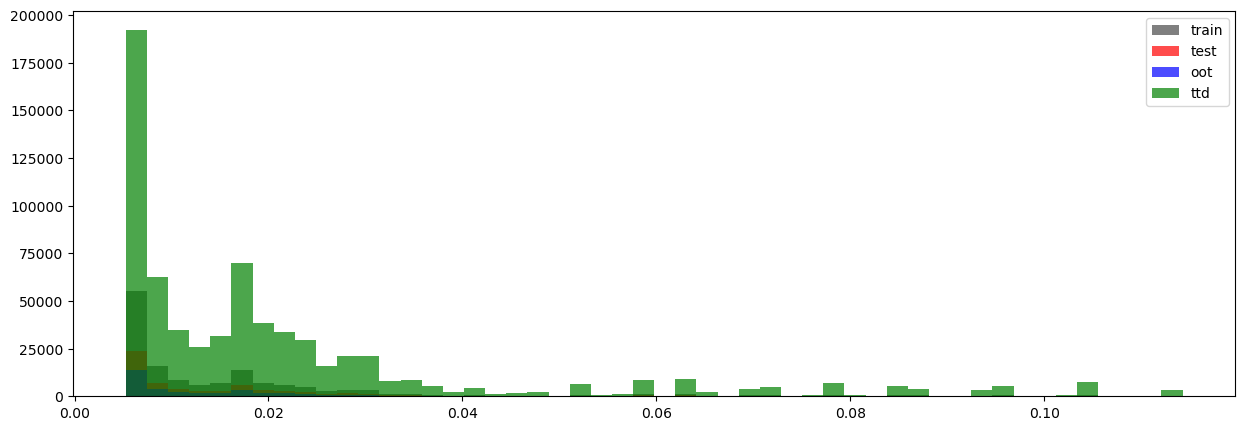

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 5))
plt.hist(Train['p1'], bins= 50, label= 'train', color= 'black', alpha= 0.5)
plt.hist(Test['p1'], bins= 50, label= 'test', color= 'red', alpha= 0.7)
plt.hist(Oot['p1'], bins= 50, label= 'oot', color= 'blue', alpha= 0.7)
plt.hist(TTD['p1'], bins= 50, label= 'ttd', color= 'green', alpha= 0.7)
plt.legend()
plt.show()

In [112]:
Train['p1'].value_counts(dropna= False).head()

p1
0.005289    12858
0.005929     5837
0.005857     5015
0.006586     3612
0.005875     3572
Name: count, dtype: int64

In [113]:
print(Train['bankruptcystatus'].value_counts(dropna= False))
print(Test['bankruptcystatus'].value_counts(dropna= False))

bankruptcystatus
[0]     141943
[1]       4543
[2]        337
[-1]        32
Name: count, dtype: int64
bankruptcystatus
[0]     60829
[1]      1941
[2]       157
[-1]       11
Name: count, dtype: int64


In [114]:
def Bucket_Order(data):
    data['lower_bound'] = data['Bucket'].str.replace('[','').str.replace(']','').str.replace('(','').str.replace(')','').str.split(',').str[0]
    data['lower_bound'] = data['lower_bound'].apply(lambda x: -np.inf if x == '-inf' else np.inf if x == 'inf' else float(x))
    data = data.sort_values('lower_bound')
    a = data.loc[data['lower_bound']==-1]
    b = data.loc[data['lower_bound']!=-1]
    b['Is_Trend']= 'Yes' if (
            (b['Train_BadRate'].is_monotonic_decreasing and b['Test_BadRate'].is_monotonic_decreasing) or
            (b['Train_BadRate'].is_monotonic_increasing and b['Test_BadRate'].is_monotonic_increasing)
        ) else 'No'
    data = pd.concat(objs=[a,b])
    data = data.drop(columns=['lower_bound'])
    return data

In [115]:
df_bv= pd.DataFrame()

for col in col_list:
    print(col)
    ### Train
    temp_tr= Train.groupby(col).agg(
        bad_count_tr= ('bad_flag', 'sum'),
        bad_rate_tr= ('bad_flag', 'mean'),
                                p1_bad_rate_tr= ('p1', 'mean'),
                                   volume_tr= ('unique_id', 'count')).reset_index()
    temp_tr.columns= ['Bucket', 'Train_BadCount', 'Train_BadRate', 'Train_P1', 'Train_Count']
    temp_tr.insert(0, 'variable', col)
    
    # temp_tr= temp_tr.sort_values(by= ['bad_rate_tr']).reset_index(drop= True)
    # temp_tr['bad_rate_rank_tr']= range(1, len(temp_tr)+1)
    # temp_tr= temp_tr.sort_values(by= ['p1_bad_rate_tr']).reset_index(drop= True)
    # temp_tr['p1_bad_rank_tr']= range(1, len(temp_tr)+1)
    
    ### Test
    temp_te= Test.groupby(col).agg(
        bad_count_te= ('bad_flag', 'sum'),
        bad_rate_te= ('bad_flag', 'mean'),
                                p1_bad_rate_te= ('p1', 'mean'),
                                  volume_te= ('unique_id', 'count')).reset_index()
    temp_te.columns= ['Bucket', 'Test_BadCount', 'Test_BadRate', 'Test_P1', 'Test_Count']
    #temp_te['variable']= col
    
    # temp_te= temp_te.sort_values(by= ['bad_rate_te']).reset_index(drop= True)
    # temp_te['bad_rate_rank_te']= range(1, len(temp_te)+1)
    # temp_te= temp_te.sort_values(by= ['p1_bad_rate_te']).reset_index(drop= True)
    # temp_te['p1_bad_rank_te']= range(1, len(temp_te)+1)
    
    ### Concatenating
    temp= temp_tr.merge(temp_te, on= ['Bucket'], how= 'left')
    # temp= temp.sort_values(by= ['bucket']).reset_index(drop= True)
    temp= Bucket_Order(temp)
    # display(temp)
    
    df_bv= pd.concat([df_bv, temp]).reset_index(drop= True)
    
    del temp, temp_tr, temp_te

assetownership
inquiryauto12month
inquiryshortterm12month
sourcenonderogcount12month
assetpropevercount
inquirytelcom12month
sourcenonderogcount
derogcount
addrlastmovetaxratiodiff
inquirynonshortterm12month
addrcurrenttaxmarketvalue
addrinputtaxvalue
criminalnonfelonycount
evictioncount
derogcount12month
addrinputtimenewest
addrprevioustimeoldest
educationprogramattended
criminalfelonycount
educationattendance
addrinputlengthofres
addrcurrentblockratio
addrinputtaxmarketvalue
bankruptcydismissed24month
addrchangecount03month
inquirycollections12month
inquirybanking12month
bankruptcychapter
addrinputsubjectcount
addrchangecount24month
addrcurrentdeedmailing
addrinputdeedmailing
addrchangecount06month
lienjudgmentcount
lienjudgmentsmallclaimscount
addrpreviouslengthofres
bankruptcystatus
assetpropnewestmortgagetype
bankruptcycount24month
assetproppurchasetimeoldest
assetproppurchasetimenewest
criminalnonfelonycount12month
assetpersonalcount
addrchangecount60month
addrinputtimelastsale
a

In [116]:
pd.options.display.max_rows= 1000
df_bv

,variable,Bucket,Train_BadCount,Train_BadRate,Train_P1,Train_Count,Test_BadCount,Test_BadRate,Test_P1,Test_Count,Is_Trend
0,assetownership,[0],1606.0,0.029652,0.030198,54162,691.0,0.029889,0.030367,23119.0,Yes
1,assetownership,[1],621.0,0.006700,0.008878,92693,268.0,0.006730,0.008884,39819.0,Yes
2,inquiryauto12month,[0],1496.0,0.011491,0.012411,130194,647.0,0.011612,0.012391,55716.0,Yes
3,inquiryauto12month,[1],731.0,0.043875,0.050581,16661,312.0,0.043201,0.050603,7222.0,Yes
4,inquiryshortterm12month,[0],2005.0,0.013959,0.016335,143630,882.0,0.014330,0.016383,61551.0,Yes
5,inquiryshortterm12month,[1],222.0,0.068837,0.034820,3225,77.0,0.055516,0.034190,1387.0,Yes
6,sourcenonderogcount12month,"[-inf, 2.0)",1730.0,0.023668,0.022178,73094,726.0,0.023263,0.022217,31209.0,Yes
7,sourcenonderogcount12month,"[2.0, inf)",497.0,0.006738,0.011353,73761,233.0,0.007343,0.011423,31729.0,Yes
8,assetpropevercount,"[-inf, 1.0)",1526.0,0.030046,0.030071,50788,663.0,0.030656,0.030245,21627.0,Yes
9,assetpropevercount,"[1.0, 2.0)",445.0,0.008564,0.010104,51963,204.0,0.009101,0.010164,22414.0,Yes


In [117]:
for client in Train['client'].unique():
    print(client)
    get_risk_rank(model= xgbm_ln_auto_v2_hpt_best_1, 
                  data= Train[Train['client']== client], 
                  data_h2o= train_h2o[train_h2o['client']== client], 
                  target= 'bad_flag', 
                  cols_tuple= col_tuple_pass, 
                  score_col= 'p1', 
                  weight= 'conwt')
    

Tower
30041 572.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.020352,0.114281,0.038002,6009,5708.0,301.0,5.01,20.0,19.37,52.62,33.25
1,0.012450,0.020352,0.016782,6008,5874.0,134.0,2.23,40.0,39.30,76.05,36.75
2,0.007291,0.012450,0.009073,6008,5926.0,82.0,1.36,60.0,59.41,90.38,30.97
3,0.005929,0.007291,0.006611,6008,5971.0,37.0,0.62,80.0,79.67,96.85,17.18
4,0.005289,0.005929,0.005621,6008,5990.0,18.0,0.30,100.0,100.00,100.00,0.00


{'Gini': 47.260000000000005, 'KS': 36.75}
GESA
19768 402.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.025515,0.114281,0.047728,3954,3762.0,192.0,4.86,20.0,19.43,47.76,28.33
1,0.018111,0.025470,0.021408,3954,3855.0,99.0,2.50,40.0,39.33,72.39,33.06
2,0.009939,0.018111,0.014488,3953,3874.0,79.0,2.00,60.0,59.34,92.04,32.70
3,0.006565,0.009939,0.007827,3954,3929.0,25.0,0.63,80.0,79.62,98.26,18.64
4,0.005289,0.006565,0.005872,3953,3946.0,7.0,0.18,100.0,100.00,100.00,0.00


{'Gini': 45.09, 'KS': 33.06}
Hawaii
1438 3.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022412,0.114281,0.036891,288,287.0,1.0,0.35,20.03,20.00,33.33,13.33
1,0.018111,0.022412,0.019834,288,288.0,0.0,0.00,40.06,40.07,33.33,6.74
2,0.014709,0.018111,0.016151,287,286.0,1.0,0.35,60.01,60.00,66.67,6.67
3,0.008158,0.014709,0.009942,288,288.0,0.0,0.00,80.04,80.07,66.67,13.40
4,0.005289,0.008158,0.006914,287,286.0,1.0,0.35,100.00,100.00,100.00,0.00


{'Gini': -0.05, 'KS': 13.4}
Guardian
19177 268.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.027018,0.114281,0.055309,3836,3698.0,138.0,3.60,20.0,19.56,51.49,31.93
1,0.018111,0.027018,0.021588,3835,3765.0,70.0,1.83,40.0,39.47,77.61,38.14
2,0.009095,0.018111,0.013383,3836,3801.0,35.0,0.91,60.0,59.57,90.67,31.10
3,0.006586,0.009095,0.007816,3835,3823.0,12.0,0.31,80.0,79.79,95.15,15.36
4,0.005289,0.006586,0.005935,3835,3822.0,13.0,0.34,100.0,100.00,100.00,0.00


{'Gini': 46.61, 'KS': 38.14}
SECU
12804 320.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024805,0.114281,0.051379,2561,2382.0,179.0,6.99,20.00,19.08,55.94,36.86
1,0.016469,0.024805,0.020178,2561,2487.0,74.0,2.89,40.00,39.00,79.06,40.06
2,0.008230,0.016469,0.012790,2561,2519.0,42.0,1.64,60.00,59.18,92.19,33.01
3,0.006505,0.008230,0.007046,2561,2541.0,20.0,0.78,80.01,79.53,98.44,18.91
4,0.005289,0.006505,0.005704,2560,2555.0,5.0,0.20,100.00,100.00,100.00,0.00


{'Gini': 51.54, 'KS': 40.06}
Arkansas
27867 167.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.018443,0.114281,0.035048,5574,5481.0,93.0,1.67,20.0,19.79,55.69,35.90
1,0.009914,0.018443,0.014064,5573,5542.0,31.0,0.56,40.0,39.79,74.25,34.46
2,0.007250,0.009914,0.008296,5574,5553.0,21.0,0.38,60.0,59.84,86.83,26.99
3,0.005929,0.007250,0.006526,5573,5558.0,15.0,0.27,80.0,79.91,95.81,15.90
4,0.005289,0.005929,0.005482,5573,5566.0,7.0,0.13,100.0,100.00,100.00,0.00


{'Gini': 45.300000000000004, 'KS': 35.9}
Numerica
18091 297.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.022483,0.114281,0.037682,3619,3488.0,131.0,3.62,20.0,19.60,44.11,24.51
1,0.014842,0.022483,0.018469,3618,3529.0,89.0,2.46,40.0,39.43,74.07,34.64
2,0.008230,0.014842,0.011047,3618,3575.0,43.0,1.19,60.0,59.53,88.55,29.02
3,0.006505,0.008230,0.007267,3618,3596.0,22.0,0.61,80.0,79.73,95.96,16.23
4,0.005289,0.006505,0.005868,3618,3606.0,12.0,0.33,100.0,100.00,100.00,0.00


{'Gini': 41.760000000000005, 'KS': 34.64}
CPM
6702 94.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.019994,0.114281,0.037488,1341,1289.0,52.0,3.88,20.01,19.51,55.32,35.81
1,0.012252,0.019994,0.015894,1340,1320.0,20.0,1.49,40.00,39.48,76.60,37.12
2,0.007344,0.012252,0.009038,1341,1329.0,12.0,0.89,60.01,59.59,89.36,29.77
3,0.005929,0.007344,0.006644,1340,1333.0,7.0,0.52,80.01,79.77,96.81,17.04
4,0.005289,0.005929,0.005547,1340,1337.0,3.0,0.22,100.00,100.00,100.00,0.00


{'Gini': 47.9, 'KS': 37.12}
Bethpage
8328 63.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.019177,0.114281,0.035890,1666,1642.0,24.0,1.44,20.00,19.87,38.10,18.23
1,0.014662,0.019177,0.016564,1666,1654.0,12.0,0.72,40.01,39.88,57.14,17.26
2,0.007250,0.014662,0.009990,1665,1650.0,15.0,0.90,60.00,59.84,80.95,21.11
3,0.005857,0.007250,0.006241,1666,1657.0,9.0,0.54,80.01,79.89,95.24,15.35
4,0.005289,0.005857,0.005363,1665,1662.0,3.0,0.18,100.00,100.00,100.00,0.00


{'Gini': 28.78, 'KS': 21.11}
HFCU
2044 33.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.020273,0.114281,0.037406,409,397.0,12.0,2.93,20.01,19.74,36.36,16.62
1,0.014662,0.020273,0.017155,409,398.0,11.0,2.69,40.02,39.53,69.70,30.17
2,0.007344,0.014662,0.010305,409,402.0,7.0,1.71,60.03,59.52,90.91,31.39
3,0.005857,0.007344,0.006506,409,407.0,2.0,0.49,80.04,79.76,96.97,17.21
4,0.005289,0.005857,0.005408,408,407.0,1.0,0.25,100.00,100.00,100.00,0.00


{'Gini': 38.17, 'KS': 31.39}
NCU
595 8.0 1


,min_score,max_score,mean_score,total,Goods,Bads,Bad_Rate,Cum_Total,Cum_Good,Cum_Bad,KS
0,0.024140,0.114281,0.044797,120,115.0,5.0,4.17,20.17,19.59,62.5,42.91
1,0.016376,0.024137,0.019264,118,115.0,3.0,2.54,40.00,39.18,100.0,60.82
2,0.008230,0.016376,0.012805,120,120.0,0.0,0.00,60.17,59.63,100.0,40.37
3,0.005929,0.008230,0.007089,119,119.0,0.0,0.00,80.17,79.90,100.0,20.10
4,0.005289,0.005929,0.005545,118,118.0,0.0,0.00,100.00,100.00,100.0,0.00


{'Gini': 65.72, 'KS': 60.82}


### Basic Checks

In [118]:
TTD['funded_flag'].sum(), Train['funded_flag'].sum(), Test['funded_flag'].sum()

(200148.0, 146855.0, 62938.0)

In [119]:
TTD['id']= TTD['unique_id']+TTD['client']
Train['id']= Train['unique_id']+Train['client']
Test['id']= Test['unique_id']+Test['client']
Oot['id']= Oot['unique_id']+Oot['client']

In [120]:
Train[(Train['id'].isin(TTD['id'].unique())) & (Train['client']!= 'CPM')].shape, Train[Train['client']!='CPM'].shape

((140153, 147), (140153, 147))

In [121]:
Test[(Test['id'].isin(TTD['id'].unique())) & (Test['client']!= 'CPM')].shape, Test[Test['client']!='CPM'].shape

((59995, 147), (59995, 147))

In [122]:
Train[(Train['id'].isin(Test['id'].unique()))].shape

(0, 147)

In [123]:
TTD[TTD['id'].isin(Train[Train['client']!= 'CPM']['id'].unique())]['p1'].describe(), Train[Train['client']!= 'CPM']['p1'].describe()

(count    140153.000000
 mean          0.016828
 std           0.017377
 min           0.005289
 25%           0.006565
 50%           0.009939
 75%           0.020090
 max           0.114281
 Name: p1, dtype: float64,
 count    140153.000000
 mean          0.016828
 std           0.017377
 min           0.005289
 25%           0.006565
 50%           0.009939
 75%           0.020090
 max           0.114281
 Name: p1, dtype: float64)

In [124]:
Train['client'].value_counts(dropna= False)

client
Tower       30041
Arkansas    27867
GESA        19768
Guardian    19177
Numerica    18091
SECU        12804
Bethpage     8328
CPM          6702
HFCU         2044
Hawaii       1438
NCU           595
Name: count, dtype: int64

In [126]:
import datetime
pref= 'With_LDA'
Train[col_tuple_pass + ['p1']].to_csv(f'{path_to_save}{pref}_Train_Auto_LN_V2_Scored_Data_{str(datetime.datetime.today().date())}.csv', index= False)
Test[col_tuple_pass + ['p1']].to_csv(f'{path_to_save}{pref}_Test_Auto_LN_V2_Scored_Data_{str(datetime.datetime.today().date())}.csv', index= False)
Oot[col_tuple_pass + ['p1']].to_csv(f'{path_to_save}{pref}_Oot_Auto_LN_V2_Scored_Data_{str(datetime.datetime.today().date())}.csv', index= False)
TTD[col_tuple_pass + ['p1']].to_csv(f'{path_to_save}{pref}_TTD_Auto_LN_V2_Scored_Data_{str(datetime.datetime.today().date())}.csv', index= False)

In [127]:
TTD['fico_cut']= np.where(((TTD['fico_pb'].isnull()) |(TTD['fico_pb']<300)),"h.Missing",
                        np.where((TTD['fico_pb']>=300) &(TTD['fico_pb']<550),"a.300-550",
                                 np.where((TTD['fico_pb']>=550) &(TTD['fico_pb']<600),"a.550-600",
                                np.where((TTD['fico_pb']>=600) &(TTD['fico_pb']<630),"b.600-629",
                                    np.where((TTD['fico_pb']>=630) &(TTD['fico_pb']<660),"c.630-659",
                                        np.where((TTD['fico_pb']>=660) &(TTD['fico_pb']<690),"d.660-689",
                                            np.where((TTD['fico_pb']>=690) &(TTD['fico_pb']<715),"e.690-714",
                                                np.where((TTD['fico_pb']>=715) & (TTD['fico_pb']<740),"f.715-739",
                                                    np.where((TTD['fico_pb']>=740),"g.740+","h.Missing")))))))))

In [128]:
TTD.groupby('fico_cut').agg(
    ttd= ('unique_id', 'count'),
    approved= ('approve_flag', 'sum'),
    funded= ('funded_flag', 'sum'),
    bad= ('bad_flag', 'sum'),
    avg_pd= ('p1', 'mean')
)

,ttd,approved,funded,bad,avg_pd
fico_cut,,,,,
a.300-550,35333,2873.0,1857.0,126.0,0.040587
a.550-600,52785,13360.0,5376.0,346.0,0.035570
b.600-629,57138,23516.0,7940.0,386.0,0.030811
c.630-659,78628,39076.0,15179.0,554.0,0.026094
d.660-689,90338,52831.0,24815.0,511.0,0.021728
e.690-714,73120,48229.0,23877.0,300.0,0.018532
f.715-739,62889,45175.0,23083.0,186.0,0.016756
g.740+,199076,167515.0,93215.0,243.0,0.011987
h.Missing,35908,9030.0,4806.0,395.0,0.030600


In [129]:
TTD.shape

(685215, 148)

In [5]:
!ls '/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_3/'

050424_LN_Auto_KGB_LDA_No_Segment_Hopt_4.csv
With_LDA_Oot_Auto_LN_V2_Scored_Data_2024-04-08.csv
With_LDA_TTD_Auto_LN_V2_Scored_Data_2024-04-08.csv
With_LDA_Test_Auto_LN_V2_Scored_Data_2024-04-08.csv
With_LDA_Train_Auto_LN_V2_Scored_Data_2024-04-08.csv
xgbm_ln_auto_v2_hpt_best_with_lda_3.zip


In [6]:
path_to_save= '/root/Unified_LN_V2/LN_Auto_V2/Model_Data/Without_LDA_Auto_LN_V2/With_LDA/Iteration_3/'
pref= 'With_LDA'
train_scored= pd.read_csv(f'{path_to_save}{pref}_Train_Auto_LN_V2_Scored_Data_2024-04-08.csv')
train_scored.shape

(146855, 12)

In [7]:
train_scored['3_digit_score']= train_scored['p1'].apply(convert_to_3_digit)
train_scored['3_digit_score'].describe()

count    146855.000000
mean        739.241769
std          32.163494
min         638.000000
25%         718.000000
50%         748.000000
75%         767.000000
max         776.000000
Name: 3_digit_score, dtype: float64

In [48]:
def get_fico_distribution(x):
    return pd.DataFrame(x.describe([0.05*i for i in range(1, 20)] + [0.99])).T#.to_dict(orient= 'records')

In [20]:
train_scored['p1'].describe([0.25, 0.9, 0.95, 0.99])

count    146855.000000
mean          0.016741
std           0.017298
min           0.005289
25%           0.006565
50%           0.009939
90%           0.030474
95%           0.057923
99%           0.095058
max           0.114281
Name: p1, dtype: float64

In [22]:
temp= []
for sc in sorted(train_scored['3_digit_score'].unique(), reverse= True):
    a= {}
    a['3_digit_score']= sc
    a['apps']= len(train_scored[train_scored['3_digit_score']== sc])
    a['min_pd']= train_scored[train_scored['3_digit_score']== sc]['p1'].min()
    a['mean_pd']= train_scored[train_scored['3_digit_score']== sc]['p1'].mean()
    a['median_pd']= train_scored[train_scored['3_digit_score']== sc]['p1'].median()
    a['max_pd']= train_scored[train_scored['3_digit_score']== sc]['p1'].max()
    
    desc= train_scored[train_scored['3_digit_score']== sc]['fico_pb'].describe([0.25, 0.75, 0.9, 0.95, 0.99])
    a['apps_c']= desc['count']
    a['fico_mean']= desc['mean']
    a['fico_min']= desc['min']
    a['fico_25%']= desc['25%']
    a['fico_50%']= desc['50%']
    a['fico_75%']= desc['75%']
    a['fico_90%']= desc['90%']
    a['fico_95%']= desc['95%']
    a['fico_99%']= desc['99%']
    a['fico_max']= desc['max']
    
    temp.append(a)

In [23]:
temp= pd.DataFrame(temp)

In [26]:
temp

,3_digit_score,apps,min_pd,mean_pd,median_pd,max_pd,apps_c,fico_mean,fico_min,fico_25%,fico_50%,fico_75%,fico_90%,fico_95%,fico_99%,fico_max
0,776,12858,0.005289,0.005289,0.005289,0.005289,12854.0,768.140968,0.0,724.00,775.0,816.75,848.0,862.00,882.00,900.0
1,772,6688,0.005842,0.005853,0.005857,0.005857,6686.0,764.598564,0.0,719.00,772.0,814.00,842.0,861.00,881.00,900.0
2,771,9553,0.005875,0.005909,0.005929,0.005929,9552.0,762.366206,0.0,717.00,773.0,815.00,846.0,863.00,882.00,900.0
3,770,1298,0.006006,0.006006,0.006006,0.006006,1297.0,752.902853,0.0,708.00,756.0,805.00,836.4,855.40,874.04,892.0
4,767,7512,0.006468,0.006528,0.006548,0.006565,7511.0,757.255625,0.0,713.00,766.0,808.00,837.0,855.00,880.00,900.0
5,766,5510,0.006586,0.006607,0.006586,0.006708,5506.0,760.191246,0.0,714.00,773.0,812.75,841.0,860.00,882.00,900.0
6,765,768,0.006732,0.006732,0.006732,0.006732,766.0,733.552219,0.0,685.00,738.0,793.00,826.5,843.75,870.70,888.0
7,763,2922,0.007080,0.007096,0.007080,0.007196,2922.0,757.022245,0.0,712.00,762.0,806.00,835.0,850.00,872.79,892.0
8,762,6769,0.007220,0.007289,0.007285,0.007367,6767.0,750.916063,0.0,708.00,759.0,804.00,832.0,850.00,875.00,896.0
9,761,1908,0.007386,0.007444,0.007441,0.007518,1908.0,736.993187,0.0,695.75,747.0,797.00,825.0,842.00,872.00,888.0


In [49]:
temp_fico= list(train_scored.groupby('p1')['fico_pb'].apply(lambda x: get_fico_distribution(x)).reset_index().to_dict(orient= 'records'))

In [50]:
temp_fico= pd.DataFrame(temp_fico)
temp_fico.head()

,p1,level_1,count,mean,std,min,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%,55%,60%,65%,70%,75%,80%,85%,90%,95%,99%,max
0,0.005289,0.005289,12854.0,768.140968,67.849312,0.0,661.0,683.0,699.0,712.0,724.00,736.0,747.00,756.0,765.0,775.0,784.0,793.0,801.00,808.0,816.75,825.0,835.00,848.0,862.00,882.00,900.0
1,0.005842,0.005842,1673.0,761.711297,70.522221,0.0,658.6,680.0,693.0,705.0,716.00,728.0,740.00,751.8,761.0,772.0,781.0,789.0,796.80,804.0,811.00,818.0,826.00,835.8,852.00,879.56,900.0
2,0.005857,0.005857,5013.0,765.562138,67.425810,0.0,660.0,679.2,696.0,708.0,720.00,733.0,743.00,753.0,762.0,772.0,781.0,791.0,798.00,807.0,815.00,824.0,833.00,845.0,862.00,881.00,900.0
3,0.005875,0.005875,3571.0,764.692523,75.550047,0.0,654.0,682.0,697.0,710.0,723.00,734.0,745.00,754.0,764.0,774.0,784.0,793.0,801.00,808.0,815.00,823.0,831.00,840.0,860.00,880.00,895.0
4,0.005907,0.005907,144.0,783.826389,60.051299,609.0,671.3,700.0,715.7,729.6,745.75,753.0,765.05,776.2,786.0,794.5,804.0,811.0,816.95,821.0,831.25,837.0,842.65,851.0,862.85,883.13,891.0


In [51]:
temp_fico= temp_fico.sort_values(by= ['count'], ascending = False).reset_index(drop= True)

In [52]:
temp_fico.head(20)

,p1,level_1,count,mean,std,min,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%,55%,60%,65%,70%,75%,80%,85%,90%,95%,99%,max
0,0.005289,0.005289,12854.0,768.140968,67.849312,0.0,661.00,683.0,699.00,712.0,724.0,736.0,747.0,756.0,765.0,775.0,784.0,793.0,801.00,808.0,816.75,825.0,835.0,848.0,862.00,882.00,900.0
1,0.005929,0.005929,5837.0,760.413569,83.538153,0.0,646.00,672.0,688.00,702.0,714.0,726.0,738.0,750.0,760.0,771.0,780.8,789.0,798.00,807.0,814.00,824.0,834.0,848.0,864.20,883.00,900.0
2,0.005857,0.005857,5013.0,765.562138,67.425810,0.0,660.00,679.2,696.00,708.0,720.0,733.0,743.0,753.0,762.0,772.0,781.0,791.0,798.00,807.0,815.00,824.0,833.0,845.0,862.00,881.00,900.0
3,0.006586,0.006586,3609.0,765.342754,75.489219,0.0,647.00,672.0,688.00,703.0,716.0,730.0,744.0,758.0,770.0,780.0,789.0,797.0,805.00,810.0,817.00,826.0,834.0,847.0,864.00,883.92,900.0
4,0.005875,0.005875,3571.0,764.692523,75.550047,0.0,654.00,682.0,697.00,710.0,723.0,734.0,745.0,754.0,764.0,774.0,784.0,793.0,801.00,808.0,815.00,823.0,831.0,840.0,860.00,880.00,895.0
5,0.014842,0.014842,3327.0,672.389841,183.751984,0.0,0.00,599.0,629.00,648.0,661.0,672.0,682.0,692.0,701.0,710.0,720.0,730.0,741.00,751.0,761.00,774.0,787.1,803.0,819.00,849.48,892.0
6,0.016469,0.016469,2581.0,687.322356,153.868181,0.0,543.00,609.0,637.00,652.0,665.0,675.0,684.0,693.0,703.0,714.0,723.0,733.0,742.00,753.0,763.00,774.0,787.0,801.0,817.00,849.20,896.0
7,0.007080,0.007080,2463.0,758.544458,62.502786,490.0,653.00,675.0,690.00,702.0,714.0,724.0,734.0,744.0,754.9,763.0,771.0,781.0,789.00,798.0,807.00,816.0,826.0,838.0,852.00,873.00,892.0
8,0.018111,0.018111,2189.0,646.366834,209.544632,0.0,0.00,553.8,608.20,634.0,649.0,659.0,670.0,680.0,689.0,698.0,707.0,717.0,728.20,739.0,751.00,766.0,781.0,796.2,815.00,836.00,888.0
9,0.006565,0.006565,1811.0,757.948095,81.030733,0.0,647.00,672.0,686.00,699.0,712.0,723.0,736.0,746.0,757.0,767.0,777.0,786.0,794.00,803.0,810.00,819.0,830.0,842.0,862.00,880.00,900.0


In [ ]:
train_scored.groupby('p1').apply(
    lambda x: x.describe([0.05*i for i in range(1, 20)] + [0.99]
                        ).sort_values(by= 'funded_flag', ascending= False).head(20)